# 对比数据画图
50和7*7

Simulating hop 1...
Simulating hop 2...
Simulating hop 3...
Simulating hop 4...
Simulating hop 5...
Simulating hop 6...
Simulating hop 7...
Simulating hop 8...
Simulating hop 9...
Simulating hop 10...
Simulating hop 11...
Simulating hop 12...
Simulating hop 13...
Simulating hop 14...
Simulating hop 15...
Simulating hop 16...
Simulating hop 17...
Simulating hop 18...
Simulating hop 19...
Simulating hop 20...
Simulating hop 21...
Simulating hop 22...
Simulating hop 23...
Simulating hop 24...
Simulating hop 25...
Simulating hop 26...
Simulating hop 27...
Simulating hop 28...
Simulating hop 29...
Simulating hop 30...
Simulating hop 31...
Simulating hop 32...
Simulating hop 33...
Simulating hop 34...
Simulating hop 35...
Simulating hop 36...
Simulating hop 37...
Simulating hop 38...
Simulating hop 39...
Simulating hop 40...
Simulating hop 41...
Simulating hop 42...
Simulating hop 43...
Simulating hop 44...
Simulating hop 45...
Simulating hop 46...
Simulating hop 47...
Simulating hop 48...
S

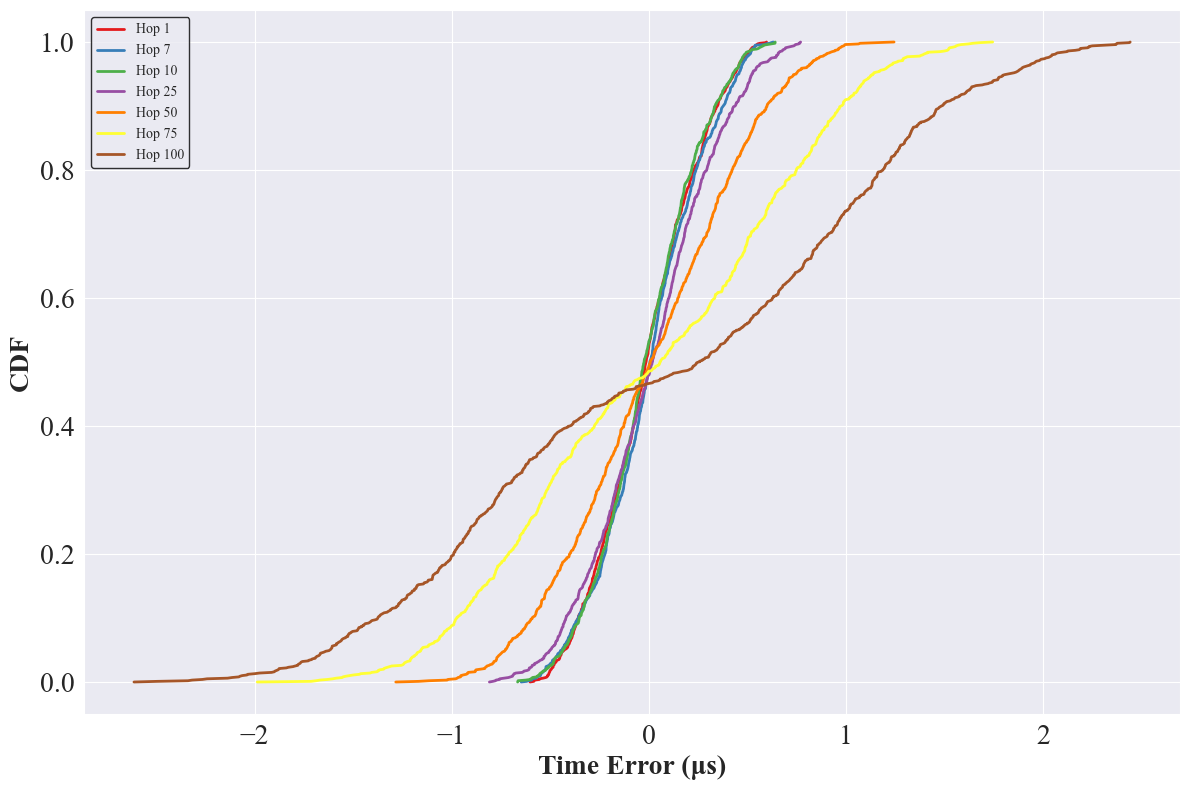

In [1]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/4/15 8:42
*  @Project :   pj_gptp_simulation
*  @Description :   Description
*  @FileName:   main20250415.py
**************************************
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

# Create the output directory
os.makedirs("version/20250413/output_data", exist_ok=True)

# Parameters from the paper
PHY_JITTER_MAX = 8e-9  # 8 ns
CLOCK_GRANULARITY = 8e-9  # 8 ns
MAX_DRIFT_RATE = 10e-6  # 10 ppm
NR_ERROR = 0.1e-6  # 0.1 ppm
RESIDENCE_TIME_MAX = 1e-3  # 1 ms
PROPAGATION_DELAY = 25e-9  # 25 ns
SYNC_INTERVAL = 31.25e-3  # 31.25 ms
NUM_SAMPLES = 1000  # Samples per hop


def calculate_time_error(hops, sync_interval=SYNC_INTERVAL):
    """
    Calculate time synchronization error based on the paper's equations.
    """
    # Basic error from clock drift (equation 11)
    gm_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    node_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    basic_error = (node_drift - gm_drift) * sync_interval

    # Errors due to PHY jitter and clock granularity
    if hops > 1:
        # Timestamp error
        timestamp_error = np.random.uniform(0, PHY_JITTER_MAX) + np.random.uniform(0, CLOCK_GRANULARITY)

        # Error propagation factor based on equations (16)-(23)
        error_factor = np.random.uniform(0.5, 1.0)

        # Calculate accumulated error (grows with hop count)
        accumulated_error = timestamp_error * error_factor * hops

        # From Figure 10 - error grows faster after ~30 hops
        if hops > 30:
            accumulated_error *= 1 + (hops - 30) / 100
    else:
        accumulated_error = 0

    # Total error
    total_error = basic_error + accumulated_error

    # Randomize sign (error can be positive or negative)
    if np.random.random() < 0.5:
        total_error = -total_error

    return total_error


# Generate data for all hops (1-100)
all_data = {}
for h in range(1, 101):
    print(f"Simulating hop {h}...")
    hop_errors = [calculate_time_error(h) for _ in range(NUM_SAMPLES)]
    all_data[h] = hop_errors

# Save to CSV with each column representing one hop
df = pd.DataFrame({hop: all_data[hop] for hop in range(1, 101)})
df.to_csv("output_data/te_data.csv", index=False)

# Target hops for plotting
target_hops = [1, 7, 10, 25, 50, 75, 100]
colors = {
    '1': '#E41A1C',  # 深红
    '2': '#377EB8',  # 深蓝
    '3': '#4DAF4A',  # 深绿
    '4': '#984EA3',  # 紫色
    '5': '#FF7F00',  # 橙色
    '6': '#FFFF33',  # 黄色
    '7': '#A65628'  # 棕色
}

# Create plot of time error distributions
plt.figure(figsize=(12, 8))

for i, hop in enumerate(target_hops):
    # Extract data for this hop and convert to microseconds
    errors = np.array(all_data[hop])
    errors_us = errors * 1e6

    # Sort errors for CDF plot
    sorted_errors = np.sort(errors_us)
    cumulative_prob = np.linspace(0, 1, len(sorted_errors))

    plt.plot(sorted_errors, cumulative_prob,
             label=f'Hop {hop}',
             color=colors[str(i + 1)],
             linewidth=2)

# Configure plot appearance
plt.grid(True)
plt.xlabel('Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('CDF', fontname='Times New Roman', fontsize=20, fontweight='bold')

plt.legend(fontsize=20, frameon=True, shadow=False, edgecolor='black',prop={'family': 'Times New Roman'})

plt.xticks(fontname='Times New Roman', fontsize=20)
plt.yticks(fontname='Times New Roman', fontsize=20)

plt.tight_layout()
plt.savefig("output_image/time_error_cdf.png", dpi=600)
plt.show()


# 进行分域的结果计算
## domain7

Simulating hop 1...
Simulating hop 2...
Simulating hop 3...
Simulating hop 4...
Simulating hop 5...
Simulating hop 6...
Simulating hop 7...
Simulating hop 8...
Simulating hop 9...
Simulating hop 10...
Simulating hop 11...
Simulating hop 12...
Simulating hop 13...
Simulating hop 14...
Simulating hop 15...
Simulating hop 16...
Simulating hop 17...
Simulating hop 18...
Simulating hop 19...
Simulating hop 20...
Simulating hop 21...
Simulating hop 22...
Simulating hop 23...
Simulating hop 24...
Simulating hop 25...
Simulating hop 26...
Simulating hop 27...
Simulating hop 28...
Simulating hop 29...
Simulating hop 30...
Simulating hop 31...
Simulating hop 32...
Simulating hop 33...
Simulating hop 34...
Simulating hop 35...
Simulating hop 36...
Simulating hop 37...
Simulating hop 38...
Simulating hop 39...
Simulating hop 40...
Simulating hop 41...
Simulating hop 42...
Simulating hop 43...
Simulating hop 44...
Simulating hop 45...
Simulating hop 46...
Simulating hop 47...
Simulating hop 48...
S

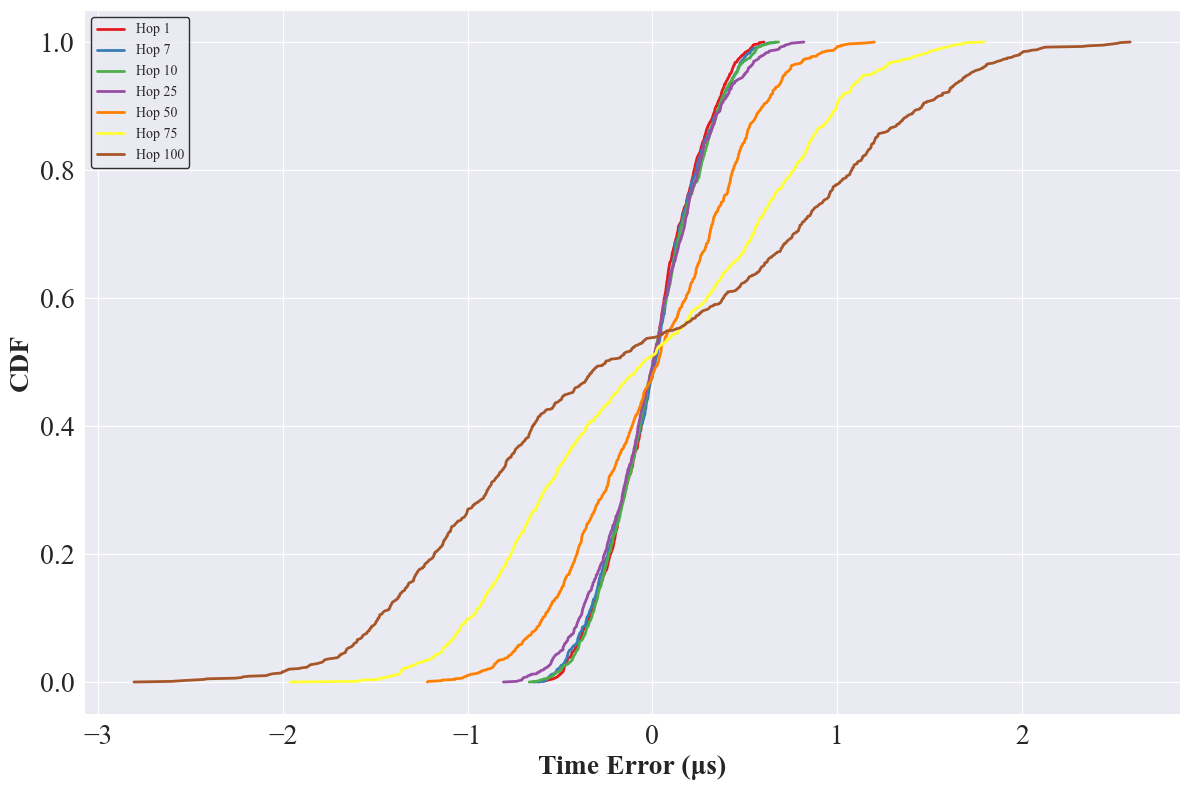

In [2]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/4/15 8:42
*  @Project :   pj_gptp_simulation
*  @Description :   Description
*  @FileName:   main20250415.py
**************************************
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

# Create the output directory
os.makedirs("version/20250413/output_data", exist_ok=True)

# Parameters from the paper
PHY_JITTER_MAX = 8e-9  # 8 ns
CLOCK_GRANULARITY = 8e-9  # 8 ns
MAX_DRIFT_RATE = 10e-6  # 10 ppm
NR_ERROR = 0.1e-6  # 0.1 ppm
RESIDENCE_TIME_MAX = 1e-3  # 1 ms
PROPAGATION_DELAY = 175e-9  # 175 ns
SYNC_INTERVAL = 31.25e-3  # 31.25 ms
NUM_SAMPLES = 1000  # Samples per hop


def calculate_time_error(hops, sync_interval=SYNC_INTERVAL):
    """
    Calculate time synchronization error based on the paper's equations.
    """
    # Basic error from clock drift (equation 11)
    gm_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    node_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    basic_error = (node_drift - gm_drift) * sync_interval

    # Errors due to PHY jitter and clock granularity
    if hops > 1:
        # Timestamp error
        timestamp_error = np.random.uniform(0, PHY_JITTER_MAX) + np.random.uniform(0, CLOCK_GRANULARITY)

        # Error propagation factor based on equations (16)-(23)
        error_factor = np.random.uniform(0.5, 1.0)

        # Calculate accumulated error (grows with hop count)
        accumulated_error = timestamp_error * error_factor * hops

        # From Figure 10 - error grows faster after ~30 hops
        if hops > 30:
            accumulated_error *= 1 + (hops - 30) / 100
    else:
        accumulated_error = 0

    # Total error
    total_error = basic_error + accumulated_error

    # Randomize sign (error can be positive or negative)
    if np.random.random() < 0.5:
        total_error = -total_error

    return total_error


# Generate data for all hops (1-100)
all_data = {}
for h in range(1, 101):
    print(f"Simulating hop {h}...")
    hop_errors = [calculate_time_error(h) for _ in range(NUM_SAMPLES)]
    all_data[h] = hop_errors

# Save to CSV with each column representing one hop
df = pd.DataFrame({hop: all_data[hop] for hop in range(1, 101)})
df.to_csv("output_data/te_data_domain7.csv", index=False)

# Target hops for plotting
target_hops = [1, 7, 10, 25, 50, 75, 100]
colors = {
    '1': '#E41A1C',  # 深红
    '2': '#377EB8',  # 深蓝
    '3': '#4DAF4A',  # 深绿
    '4': '#984EA3',  # 紫色
    '5': '#FF7F00',  # 橙色
    '6': '#FFFF33',  # 黄色
    '7': '#A65628'  # 棕色
}

# Create plot of time error distributions
plt.figure(figsize=(12, 8))

for i, hop in enumerate(target_hops):
    # Extract data for this hop and convert to microseconds
    errors = np.array(all_data[hop])
    errors_us = errors * 1e6

    # Sort errors for CDF plot
    sorted_errors = np.sort(errors_us)
    cumulative_prob = np.linspace(0, 1, len(sorted_errors))

    plt.plot(sorted_errors, cumulative_prob,
             label=f'Hop {hop}',
             color=colors[str(i + 1)],
             linewidth=2)

# Configure plot appearance
plt.grid(True)
plt.xlabel('Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('CDF', fontname='Times New Roman', fontsize=20, fontweight='bold')

plt.legend(fontsize=20, frameon=True, shadow=False, edgecolor='black',prop={'family': 'Times New Roman'})

plt.xticks(fontname='Times New Roman', fontsize=20)
plt.yticks(fontname='Times New Roman', fontsize=20)

plt.tight_layout()
plt.savefig("output_image/time_error_cdf_domain7.png", dpi=600)
plt.show()


## 读取一下7跳的结果，比对一下。


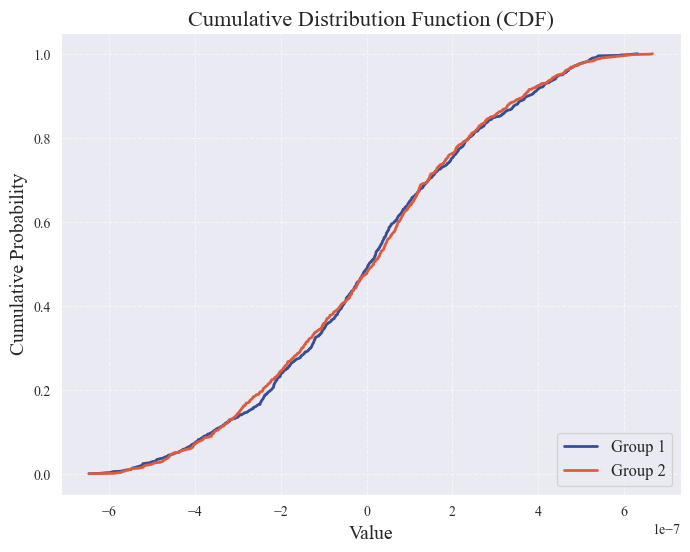

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# 设置全局字体为Times New Roman
rcParams['font.family'] = 'Times New Roman'

# 定义颜色
colors = ['#354e97', '#df5b3f', '#f5b46f']

# 读取数据
# 读取第一个文件，跳过第一行（标题行），获取第7列数据（索引为6）
data1 = pd.read_csv('output_data/te_data.csv', header=None, skiprows=1, usecols=[6])
# 读取第二个文件，跳过第一行（标题行），获取第7列数据（索引为6）
data2 = pd.read_csv('output_data/te_data_domain7.csv', header=None, skiprows=1, usecols=[6])

# 转换为numpy数组并展平
data1 = data1.values.flatten()
data2 = data2.values.flatten()

# 创建图形
plt.figure(figsize=(8, 6))

# 计算并绘制第一组数据的CDF
sorted_data1 = np.sort(data1)
yvals1 = np.arange(len(sorted_data1)) / float(len(sorted_data1) - 1)
plt.plot(sorted_data1, yvals1, color=colors[0], linewidth=2, label='Group 1')

# 计算并绘制第二组数据的CDF
sorted_data2 = np.sort(data2)
yvals2 = np.arange(len(sorted_data2)) / float(len(sorted_data2) - 1)
plt.plot(sorted_data2, yvals2, color=colors[1], linewidth=2, label='Group 2')

# 添加图例和标签
plt.legend(loc='lower right', fontsize=12)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Cumulative Probability', fontsize=14)
plt.title('Cumulative Distribution Function (CDF)', fontsize=16)

# 设置网格
plt.grid(True, linestyle='--', alpha=0.6)

# 确保output_image文件夹存在
import os
os.makedirs('output_image', exist_ok=True)

# 保存图像
plt.savefig('output_image/cdf_comparison.png', dpi=300, bbox_inches='tight')

# 显示图像
plt.show()


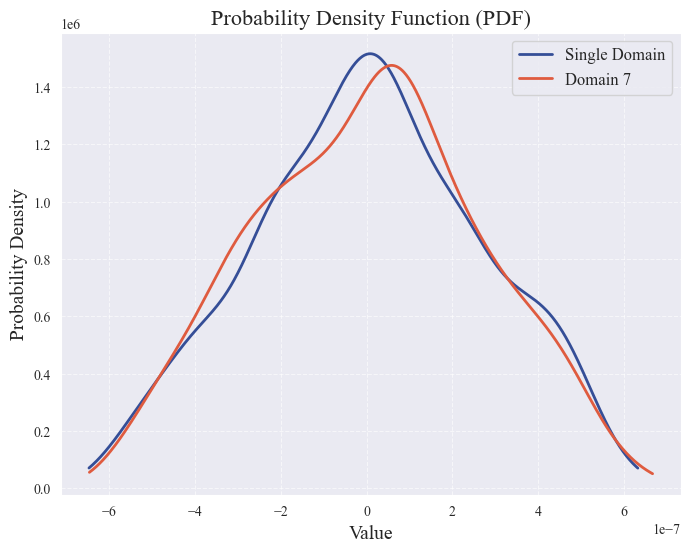

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from scipy.stats import gaussian_kde

# 设置全局字体为Times New Roman
rcParams['font.family'] = 'Times New Roman'

# 定义颜色
colors = ['#354e97', '#df5b3f', '#f5b46f']

# 读取数据
# 读取第一个文件，跳过第一行（标题行），获取第7列数据（索引为6）
data1 = pd.read_csv('output_data/te_data.csv', header=None, skiprows=1, usecols=[6])
# 读取第二个文件，跳过第一行（标题行），获取第7列数据（索引为6）
data2 = pd.read_csv('output_data/te_data_domain7.csv', header=None, skiprows=1, usecols=[6])

# 转换为numpy数组并展平
data1 = data1.values.flatten()
data2 = data2.values.flatten()

# 创建图形
plt.figure(figsize=(8, 6))

# 计算第一组数据的KDE
kde1 = gaussian_kde(data1)
x1 = np.linspace(min(data1), max(data1), 1000)
plt.plot(x1, kde1(x1), color=colors[0], linewidth=2, label='Single Domain')

# 计算第二组数据的KDE
kde2 = gaussian_kde(data2)
x2 = np.linspace(min(data2), max(data2), 1000)
plt.plot(x2, kde2(x2), color=colors[1], linewidth=2, label='Domain 7')

# 添加图例和标签
plt.legend(loc='upper right', fontsize=12)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.title('Probability Density Function (PDF)', fontsize=16)

# 设置网格
plt.grid(True, linestyle='--', alpha=0.6)

# 确保output_image文件夹存在
import os
os.makedirs('output_image', exist_ok=True)

# 保存图像
plt.savefig('output_image/pdf_comparison.png', dpi=300, bbox_inches='tight')

# 显示图像
plt.show()


# 对比原始100跳和domain7

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 设置全局字体为Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

# 定义颜色
colors = ['#354e97', '#df5b3f', '#f5b46f']

# 读取数据
# 第一组数据：读取第7列（索引为6），跳过第一行
data1 = pd.read_csv('output_data/te_data.csv', header=None, usecols=[6], skiprows=1).values.flatten()
# 第二组数据：读取整个文件，跳过第一行
data2 = pd.read_csv('output_data/te_data_domain7.csv', header=None, skiprows=1).values.flatten()

# 创建图形
plt.figure(figsize=(8, 6))

# 计算并绘制第一组数据的CDF
sorted_data1 = np.sort(data1)
yvals1 = np.arange(len(sorted_data1)) / float(len(sorted_data1) - 1)
plt.plot(sorted_data1, yvals1, color=colors[0], linewidth=2, label='Single Domain')

# 计算并绘制第二组数据的CDF
sorted_data2 = np.sort(data2)
yvals2 = np.arange(len(sorted_data2)) / float(len(sorted_data2) - 1)
plt.plot(sorted_data2, yvals2, color=colors[1], linewidth=2, label='Domain 7')

# 添加图例和标签
plt.legend(loc='lower right', fontsize=12)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Cumulative Probability', fontsize=14)
plt.title('Cumulative Distribution Function', fontsize=16)

# 设置网格
plt.grid(True, linestyle='--', alpha=0.6)

# 调整布局
plt.tight_layout()

# 保存图像到output_image文件夹
import os
if not os.path.exists('output_image'):
    os.makedirs('output_image')
plt.savefig('output_image/cdf_comparison_te+domain7.png', dpi=300, bbox_inches='tight')

# 显示图像
plt.show()


# 胡乐东论文融合在同步中

Generating data for single domain approach...
Simulating single domain hop 1...
Simulating single domain hop 2...
Simulating single domain hop 3...
Simulating single domain hop 4...
Simulating single domain hop 5...
Simulating single domain hop 6...
Simulating single domain hop 7...
Simulating single domain hop 8...
Simulating single domain hop 9...
Simulating single domain hop 10...
Simulating single domain hop 11...
Simulating single domain hop 12...
Simulating single domain hop 13...
Simulating single domain hop 14...
Simulating single domain hop 15...
Simulating single domain hop 16...
Simulating single domain hop 17...
Simulating single domain hop 18...
Simulating single domain hop 19...
Simulating single domain hop 20...
Simulating single domain hop 21...
Simulating single domain hop 22...
Simulating single domain hop 23...
Simulating single domain hop 24...
Simulating single domain hop 25...
Simulating single domain hop 26...
Simulating single domain hop 27...
Simulating single 

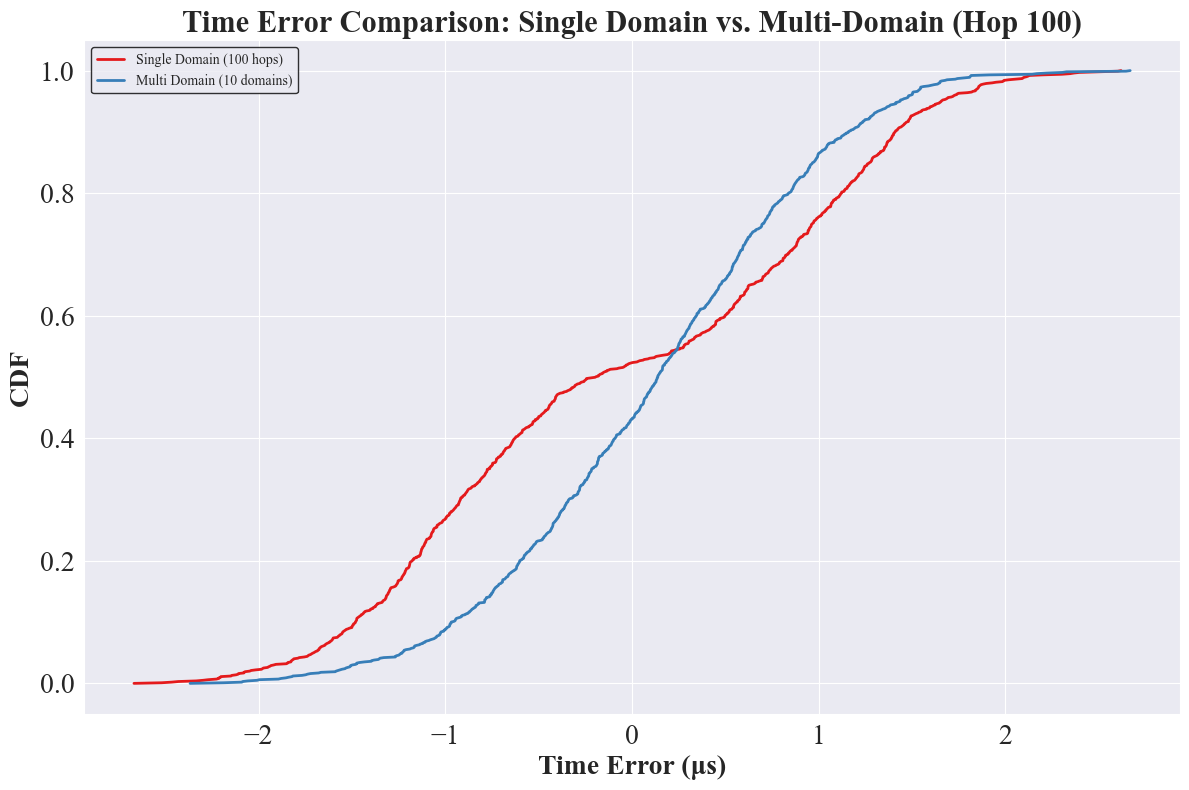

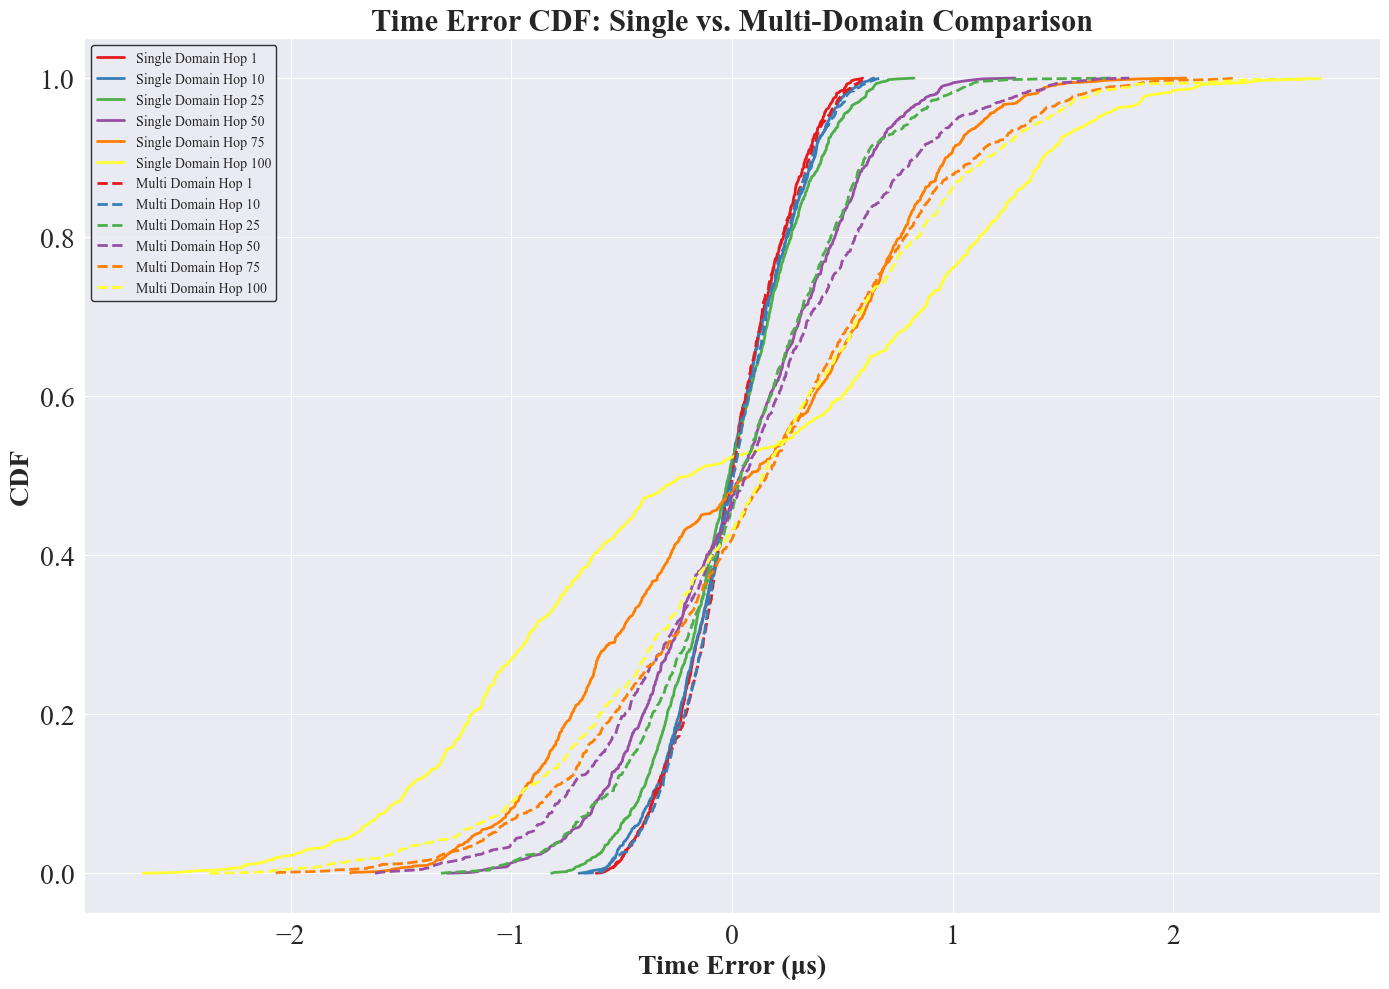

In [7]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/4/15 8:42
*  @Project :   pj_gptp_simulation
*  @Description :   IEEE 802.1AS Multi-Domain Simulation
*  @FileName:   main20250415_multi_domain.py
**************************************
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

# Create the output directory
os.makedirs("output_data", exist_ok=True)
os.makedirs("output_image", exist_ok=True)

# Parameters from the paper
PHY_JITTER_MAX = 8e-9  # 8 ns
CLOCK_GRANULARITY = 8e-9  # 8 ns
MAX_DRIFT_RATE = 10e-6  # 10 ppm
NR_ERROR = 0.1e-6  # 0.1 ppm
RESIDENCE_TIME_MAX = 1e-3  # 1 ms
PROPAGATION_DELAY = 25e-9  # 25 ns
SYNC_INTERVAL = 31.25e-3  # 31.25 ms
NUM_SAMPLES = 1000  # Samples per hop

# Parameters for multi-domain simulation
DOMAIN_SIZE = 10  # Number of hops per domain
DOMAIN_BOUNDARY_ERROR_MAX = 30e-9  # Maximum error at domain boundaries (30 ns)


def calculate_time_error(hops, sync_interval=SYNC_INTERVAL):
    """
    Calculate time synchronization error based on the paper's equations for single domain.
    """
    # Basic error from clock drift (equation 11)
    gm_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    node_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    basic_error = (node_drift - gm_drift) * sync_interval

    # Errors due to PHY jitter and clock granularity
    if hops > 1:
        # Timestamp error
        timestamp_error = np.random.uniform(0, PHY_JITTER_MAX) + np.random.uniform(0, CLOCK_GRANULARITY)

        # Error propagation factor based on equations (16)-(23)
        error_factor = np.random.uniform(0.5, 1.0)

        # Calculate accumulated error (grows with hop count)
        accumulated_error = timestamp_error * error_factor * hops

        # From Figure 10 - error grows faster after ~30 hops
        if hops > 30:
            accumulated_error *= 1 + (hops - 30) / 100
    else:
        accumulated_error = 0

    # Total error
    total_error = basic_error + accumulated_error

    # Randomize sign (error can be positive or negative)
    if np.random.random() < 0.5:
        total_error = -total_error

    return total_error


def calculate_multi_domain_time_error(total_hops, domain_size=DOMAIN_SIZE):
    """
    Calculate time synchronization error with multi-domain approach.
    
    In multi-domain approach:
    - Network is divided into multiple domains
    - Each domain has its own GM
    - Last node of domain i is the first node (GM) of domain i+1
    - Additional errors occur at domain boundaries as described in Hu et al. paper
    """
    # Calculate number of domains needed to cover total_hops
    num_domains = math.ceil(total_hops / domain_size)
    
    # Initialize cumulative error
    total_error = 0
    
    # Process each domain
    remaining_hops = total_hops
    for domain in range(num_domains):
        # Calculate hops in this domain
        domain_hops = min(domain_size, remaining_hops)
        remaining_hops -= domain_hops
        
        # Calculate error for this domain
        domain_error = calculate_time_error(domain_hops)
        
        # Add domain error to total
        total_error += domain_error
        
        # Add cross-domain boundary error (tΔ in the paper)
        # Only add if this isn't the last domain and we have more hops to process
        if domain < num_domains - 1 and remaining_hops > 0:
            # Cross-domain error as described in Hu et al. paper
            # This represents the time error between the slave port and master port
            # of the bridge connecting two domains
            boundary_error = np.random.uniform(0, DOMAIN_BOUNDARY_ERROR_MAX)
            total_error += boundary_error
    
    return total_error


# Generate data for single domain approach (original method)
print("Generating data for single domain approach...")
single_domain_data = {}
for h in range(1, 101):
    print(f"Simulating single domain hop {h}...")
    hop_errors = [calculate_time_error(h) for _ in range(NUM_SAMPLES)]
    single_domain_data[h] = hop_errors

# Save to CSV
single_df = pd.DataFrame({hop: single_domain_data[hop] for hop in range(1, 101)})
single_df.to_csv("output_data/single_domain_data.csv", index=False)

# Generate data for multi-domain approach
print("Generating data for multi-domain approach...")
multi_domain_data = {}
for h in range(1, 101):
    print(f"Simulating multi-domain hop {h}...")
    hop_errors = [calculate_multi_domain_time_error(h) for _ in range(NUM_SAMPLES)]
    multi_domain_data[h] = hop_errors

# Save multi-domain data to CSV
multi_df = pd.DataFrame({hop: multi_domain_data[hop] for hop in range(1, 101)})
multi_df.to_csv("output_data/multi_domain_data.csv", index=False)

# Target hops for plotting
target_hops = [1, 10, 25, 50, 75, 100]
colors = {
    '1': '#E41A1C',  # 深红
    '2': '#377EB8',  # 深蓝
    '3': '#4DAF4A',  # 深绿
    '4': '#984EA3',  # 紫色
    '5': '#FF7F00',  # 橙色
    '6': '#FFFF33',  # 黄色
    '7': '#A65628'   # 棕色
}

# Create comparison plot for hop 100 (single domain vs multi-domain)
plt.figure(figsize=(12, 8))

# Single domain data for hop 100
errors_single = np.array(single_domain_data[100])
errors_single_us = errors_single * 1e6  # Convert to microseconds
sorted_errors_single = np.sort(errors_single_us)
cumulative_prob_single = np.linspace(0, 1, len(sorted_errors_single))

# Multi domain data for hop 100
errors_multi = np.array(multi_domain_data[100])
errors_multi_us = errors_multi * 1e6  # Convert to microseconds
sorted_errors_multi = np.sort(errors_multi_us)
cumulative_prob_multi = np.linspace(0, 1, len(sorted_errors_multi))

# Plot both distributions
plt.plot(sorted_errors_single, cumulative_prob_single,
         label='Single Domain (100 hops)',
         color='#E41A1C',  # red
         linewidth=2)
         
plt.plot(sorted_errors_multi, cumulative_prob_multi,
         label='Multi Domain (10 domains)',
         color='#377EB8',  # blue
         linewidth=2)

# Configure plot appearance
plt.grid(True)
plt.xlabel('Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('CDF', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.legend(fontsize=20, frameon=True, shadow=False, edgecolor='black', prop={'family': 'Times New Roman'})
plt.xticks(fontname='Times New Roman', fontsize=20)
plt.yticks(fontname='Times New Roman', fontsize=20)
plt.title('Time Error Comparison: Single Domain vs. Multi-Domain (Hop 100)', fontname='Times New Roman', fontsize=22, fontweight='bold')
plt.tight_layout()
plt.savefig("output_image/domain_comparison_cdf.png", dpi=600)
plt.show()

# Create CDF plots for multiple target hops in both approaches
plt.figure(figsize=(14, 10))

# Plot for single domain
for i, hop in enumerate(target_hops):
    errors = np.array(single_domain_data[hop])
    errors_us = errors * 1e6
    sorted_errors = np.sort(errors_us)
    cumulative_prob = np.linspace(0, 1, len(sorted_errors))
    
    plt.plot(sorted_errors, cumulative_prob,
             label=f'Single Domain Hop {hop}',
             color=colors[str(i+1)],
             linestyle='-',
             linewidth=2)

# Plot for multi domain
for i, hop in enumerate(target_hops):
    errors = np.array(multi_domain_data[hop])
    errors_us = errors * 1e6
    sorted_errors = np.sort(errors_us)
    cumulative_prob = np.linspace(0, 1, len(sorted_errors))
    
    plt.plot(sorted_errors, cumulative_prob,
             label=f'Multi Domain Hop {hop}',
             color=colors[str(i+1)],
             linestyle='--',
             linewidth=2)

# Configure plot appearance
plt.grid(True)
plt.xlabel('Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('CDF', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.legend(fontsize=16, frameon=True, shadow=False, edgecolor='black', prop={'family': 'Times New Roman'})
plt.xticks(fontname='Times New Roman', fontsize=20)
plt.yticks(fontname='Times New Roman', fontsize=20)
plt.title('Time Error CDF: Single vs. Multi-Domain Comparison', fontname='Times New Roman', fontsize=22, fontweight='bold')
plt.tight_layout()
plt.savefig("output_image/all_hops_comparison_cdf.png", dpi=600)
plt.show()

# 加入自己的理解
19跳=9跳(每跳50m)+10跳(每跳5m

In [10]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/4/15 8:42
*  @Project :   pj_gptp_simulation
*  @Description :   IEEE 802.1AS Multi-Domain Simulation
*  @FileName:   main20250415_multi_domain.py
**************************************
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

# Create the output directories
os.makedirs("output_data", exist_ok=True)
os.makedirs("output_image", exist_ok=True)

# Parameters from the paper
PHY_JITTER_MAX = 8e-9  # 8 ns
CLOCK_GRANULARITY = 8e-9  # 8 ns
MAX_DRIFT_RATE = 10e-6  # 10 ppm
NR_ERROR = 0.1e-6  # 0.1 ppm
RESIDENCE_TIME_MAX = 1e-3  # 1 ms
PROPAGATION_DELAY = 25e-9  # 25 ns
SYNC_INTERVAL = 31.25e-3  # 31.25 ms
NUM_SAMPLES = 1000  # Samples per hop

# Parameters for multi-domain simulation
DOMAIN_SIZE = 10  # Number of hops per domain
DOMAIN_BOUNDARY_ERROR_MAX = 30e-9  # Maximum error at domain boundaries (30 ns)


def calculate_time_error(hops, sync_interval=SYNC_INTERVAL):
    """
    Calculate time synchronization error based on the paper's equations for single domain.
    """
    # Basic error from clock drift (equation 11)
    gm_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    node_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    basic_error = (node_drift - gm_drift) * sync_interval

    # Errors due to PHY jitter and clock granularity
    if hops > 1:
        # Timestamp error
        timestamp_error = np.random.uniform(0, PHY_JITTER_MAX) + np.random.uniform(0, CLOCK_GRANULARITY)

        # Error propagation factor based on equations (16)-(23)
        error_factor = np.random.uniform(0.5, 1.0)

        # Calculate accumulated error (grows with hop count)
        accumulated_error = timestamp_error * error_factor * hops

        # From Figure 10 - error grows faster after ~30 hops
        if hops > 30:
            accumulated_error *= 1 + (hops - 30) / 100
    else:
        accumulated_error = 0

    # Total error
    total_error = basic_error + accumulated_error

    # Randomize sign (error can be positive or negative)
    if np.random.random() < 0.5:
        total_error = -total_error

    return total_error


def calculate_multi_domain_time_error(total_hops, domain_size=DOMAIN_SIZE):
    """
    Calculate time synchronization error with multi-domain approach.
    
    In this approach:
    - Each domain has its own GM
    - Error only accumulates within each domain (max domain_size hops)
    - Additional errors occur at domain boundaries
    """
    # Calculate which domain and which hop within that domain
    current_domain = (total_hops - 1) // domain_size + 1
    hop_within_domain = ((total_hops - 1) % domain_size) + 1
    
    # Calculate domain-internal error (only from current domain's GM)
    domain_error = calculate_time_error(hop_within_domain)
    
    # Add boundary errors from all previous domain crossings
    boundary_errors = 0
    if current_domain > 1:
        # Accumulate errors from each boundary crossing
        for i in range(current_domain - 1):
            boundary_error = np.random.uniform(0, DOMAIN_BOUNDARY_ERROR_MAX)
            # In real systems, boundary errors can be positive or negative
            if np.random.random() < 0.5:
                boundary_error = -boundary_error
            boundary_errors += boundary_error
    
    # Total error is domain-internal error plus all boundary crossing errors
    total_error = domain_error + boundary_errors
    
    return total_error


# Generate data for single domain approach (original method)
print("Generating data for single domain approach...")
single_domain_data = {}
for h in range(1, 101):
    print(f"Simulating single domain hop {h}...")
    hop_errors = [calculate_time_error(h) for _ in range(NUM_SAMPLES)]
    single_domain_data[h] = hop_errors

# Save to CSV
single_df = pd.DataFrame({hop: single_domain_data[hop] for hop in range(1, 101)})
single_df.to_csv("output_data/single_domain_data_v2.csv", index=False)

# Generate data for multi-domain approach
print("Generating data for multi-domain approach...")
multi_domain_data = {}
for h in range(1, 101):
    print(f"Simulating multi-domain hop {h}...")
    hop_errors = [calculate_multi_domain_time_error(h) for _ in range(NUM_SAMPLES)]
    multi_domain_data[h] = hop_errors

# Save multi-domain data to CSV
multi_df = pd.DataFrame({hop: multi_domain_data[hop] for hop in range(1, 101)})
multi_df.to_csv("output_data/multi_domain_data_v2.csv", index=False)

# Plot 1: Comparison of Time Error CDF for hop 100
plt.figure(figsize=(12, 8))

# Single domain data for hop 100
errors_single = np.array(single_domain_data[100])
errors_single_us = errors_single * 1e6  # Convert to microseconds
sorted_errors_single = np.sort(errors_single_us)
cumulative_prob_single = np.linspace(0, 1, len(sorted_errors_single))

# Multi domain data for hop 100
errors_multi = np.array(multi_domain_data[100])
errors_multi_us = errors_multi * 1e6  # Convert to microseconds
sorted_errors_multi = np.sort(errors_multi_us)
cumulative_prob_multi = np.linspace(0, 1, len(sorted_errors_multi))

# Calculate statistics for annotations
single_median = np.median(np.abs(errors_single_us))
multi_median = np.median(np.abs(errors_multi_us))
single_max = np.max(np.abs(errors_single_us))
multi_max = np.max(np.abs(errors_multi_us))

# Plot both distributions
plt.plot(sorted_errors_single, cumulative_prob_single,
         label=f'Single Domain (Median: {single_median:.2f}μs, Max: {single_max:.2f}μs)',
         color='#E41A1C',  # red
         linewidth=2)
         
plt.plot(sorted_errors_multi, cumulative_prob_multi,
         label=f'Multi Domain (Median: {multi_median:.2f}μs, Max: {multi_max:.2f}μs)',
         color='#377EB8',  # blue
         linewidth=2)

# Configure plot appearance
plt.grid(True, alpha=0.3)
plt.xlabel('Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('CDF', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.legend(fontsize=16, frameon=True, shadow=False, edgecolor='black', prop={'family': 'Times New Roman'})
plt.xticks(fontname='Times New Roman', fontsize=20)
plt.yticks(fontname='Times New Roman', fontsize=20)
plt.title('Time Error Comparison: Single Domain vs. Multi-Domain (Hop 100)', fontname='Times New Roman', fontsize=22, fontweight='bold')
plt.tight_layout()
plt.savefig("output_image/domain_comparison_cdf_v2.png", dpi=600)
plt.close()

# Plot 2: Time Error vs Hop Number for both approaches
plt.figure(figsize=(14, 10))

# Prepare data for boxplot - single domain
single_domain_abs_errors = {}
for h in range(1, 101, 5):  # Sample every 5 hops for clarity
    errors = np.array(single_domain_data[h])
    errors_us = errors * 1e6  # Convert to microseconds
    single_domain_abs_errors[h] = np.abs(errors_us)  # Use absolute errors

# Prepare data for boxplot - multi domain
multi_domain_abs_errors = {}
for h in range(1, 101, 5):  # Sample every 5 hops for clarity
    errors = np.array(multi_domain_data[h])
    errors_us = errors * 1e6  # Convert to microseconds
    multi_domain_abs_errors[h] = np.abs(errors_us)  # Use absolute errors

# Plot median values with error bars (more readable than raw boxplots)
hops = list(single_domain_abs_errors.keys())

single_medians = [np.median(single_domain_abs_errors[h]) for h in hops]
single_q1 = [np.percentile(single_domain_abs_errors[h], 25) for h in hops]
single_q3 = [np.percentile(single_domain_abs_errors[h], 75) for h in hops]

multi_medians = [np.median(multi_domain_abs_errors[h]) for h in hops]
multi_q1 = [np.percentile(multi_domain_abs_errors[h], 25) for h in hops]
multi_q3 = [np.percentile(multi_domain_abs_errors[h], 75) for h in hops]

plt.plot(hops, single_medians, 'o-', color='#E41A1C', label='Single Domain', linewidth=2, markersize=8)
plt.fill_between(hops, single_q1, single_q3, color='#E41A1C', alpha=0.2)

plt.plot(hops, multi_medians, 's-', color='#377EB8', label='Multi Domain', linewidth=2, markersize=8)
plt.fill_between(hops, multi_q1, multi_q3, color='#377EB8', alpha=0.2)

# Add vertical lines at domain boundaries
for i in range(1, 10):
    boundary = i * DOMAIN_SIZE
    plt.axvline(x=boundary, color='gray', linestyle='--', alpha=0.7)

# Configure plot appearance
plt.grid(True, alpha=0.3)
plt.xlabel('Hop Number', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('Absolute Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.legend(fontsize=18, frameon=True, shadow=False, edgecolor='black', prop={'family': 'Times New Roman'})
plt.xticks(fontname='Times New Roman', fontsize=20)
plt.yticks(fontname='Times New Roman', fontsize=20)
plt.title('Time Error vs. Hop Number', fontname='Times New Roman', fontsize=22, fontweight='bold')
plt.tight_layout()
plt.savefig("output_image/hop_vs_error_v2.png", dpi=600)
plt.close()

# Plot 3: Target hops CDF comparison
target_hops = [10, 50, 100]
colors = {
    '10': '#E41A1C',   # red
    '50': '#4DAF4A',   # green
    '100': '#984EA3',  # purple
}

plt.figure(figsize=(14, 10))

# Plot for each target hop (both single and multi domain)
for hop in target_hops:
    # Single domain
    errors_single = np.array(single_domain_data[hop])
    errors_single_us = errors_single * 1e6
    sorted_errors_single = np.sort(errors_single_us)
    cumulative_prob_single = np.linspace(0, 1, len(sorted_errors_single))
    
    plt.plot(sorted_errors_single, cumulative_prob_single,
             label=f'Single Domain - Hop {hop}',
             color=colors[str(hop)],
             linestyle='-',
             linewidth=2)
    
    # Multi domain
    errors_multi = np.array(multi_domain_data[hop])
    errors_multi_us = errors_multi * 1e6
    sorted_errors_multi = np.sort(errors_multi_us)
    cumulative_prob_multi = np.linspace(0, 1, len(sorted_errors_multi))
    
    plt.plot(sorted_errors_multi, cumulative_prob_multi,
             label=f'Multi Domain - Hop {hop}',
             color=colors[str(hop)],
             linestyle='--',
             linewidth=2)

# Configure plot appearance
plt.grid(True, alpha=0.3)
plt.xlabel('Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('CDF', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.legend(fontsize=16, frameon=True, shadow=False, edgecolor='black', prop={'family': 'Times New Roman'})
plt.xticks(fontname='Times New Roman', fontsize=20)
plt.yticks(fontname='Times New Roman', fontsize=20)
plt.title('Time Error CDF: Single vs. Multi-Domain Comparison', fontname='Times New Roman', fontsize=22, fontweight='bold')
plt.tight_layout()
plt.savefig("output_image/target_hops_comparison_cdf_v2.png", dpi=600)
plt.close()

print("Simulation complete. Results saved to output_data/ and output_image/ directories.")

Generating data for single domain approach...
Simulating single domain hop 1...
Simulating single domain hop 2...
Simulating single domain hop 3...
Simulating single domain hop 4...
Simulating single domain hop 5...
Simulating single domain hop 6...
Simulating single domain hop 7...
Simulating single domain hop 8...
Simulating single domain hop 9...
Simulating single domain hop 10...
Simulating single domain hop 11...
Simulating single domain hop 12...
Simulating single domain hop 13...
Simulating single domain hop 14...
Simulating single domain hop 15...
Simulating single domain hop 16...
Simulating single domain hop 17...
Simulating single domain hop 18...
Simulating single domain hop 19...
Simulating single domain hop 20...
Simulating single domain hop 21...
Simulating single domain hop 22...
Simulating single domain hop 23...
Simulating single domain hop 24...
Simulating single domain hop 25...
Simulating single domain hop 26...
Simulating single domain hop 27...
Simulating single 

# 模拟不同大小的域？

In [ ]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/4/15 8:42
*  @Project :   pj_gptp_simulation
*  @Description :   IEEE 802.1AS Multi-Domain Simulation with Variable Domain Size
*  @FileName:   main20250415_multi_domain_variable.py
**************************************
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import time

# Create the output directories
os.makedirs("output_data", exist_ok=True)
os.makedirs("output_image", exist_ok=True)

# Parameters from the paper
PHY_JITTER_MAX = 8e-9  # 8 ns
CLOCK_GRANULARITY = 8e-9  # 8 ns
MAX_DRIFT_RATE = 10e-6  # 10 ppm
NR_ERROR = 0.1e-6  # 0.1 ppm
RESIDENCE_TIME_MAX = 1e-3  # 1 ms
PROPAGATION_DELAY = 25e-9  # 25 ns
SYNC_INTERVAL = 31.25e-3  # 31.25 ms
NUM_SAMPLES = 1000  # Samples per hop
TOTAL_HOPS = 100  # Total number of hops to simulate

# Parameters for multi-domain simulation
DOMAIN_BOUNDARY_ERROR_MAX = 30e-9  # Maximum error at domain boundaries (30 ns)

# Define different domain size configurations to test
DOMAIN_SIZE_CONFIGS = {
    'small': 5,    # 5 hops per domain (20 domains total)
    'medium': 10,  # 10 hops per domain (10 domains total)
    'large': 20,   # 20 hops per domain (5 domains total)
    'xlarge': 50,  # 50 hops per domain (2 domains total)
}


def calculate_time_error(hops, sync_interval=SYNC_INTERVAL):
    """
    Calculate time synchronization error based on the paper's equations for single domain.
    """
    # Basic error from clock drift (equation 11)
    gm_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    node_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    basic_error = (node_drift - gm_drift) * sync_interval

    # Errors due to PHY jitter and clock granularity
    if hops > 1:
        # Timestamp error
        timestamp_error = np.random.uniform(0, PHY_JITTER_MAX) + np.random.uniform(0, CLOCK_GRANULARITY)

        # Error propagation factor based on equations (16)-(23)
        error_factor = np.random.uniform(0.5, 1.0)

        # Calculate accumulated error (grows with hop count)
        accumulated_error = timestamp_error * error_factor * hops

        # From Figure 10 - error grows faster after ~30 hops
        if hops > 30:
            accumulated_error *= 1 + (hops - 30) / 100
    else:
        accumulated_error = 0

    # Total error
    total_error = basic_error + accumulated_error

    # Randomize sign (error can be positive or negative)
    if np.random.random() < 0.5:
        total_error = -total_error

    return total_error


def calculate_multi_domain_time_error(total_hops, domain_size):
    """
    Calculate time synchronization error with multi-domain approach.
    
    In this approach:
    - Each domain has its own GM
    - Error only accumulates within each domain (max domain_size hops)
    - Additional errors occur at domain boundaries
    
    Args:
        total_hops: The total number of hops from the network entry
        domain_size: Number of hops per domain
    """
    # Calculate which domain and which hop within that domain
    current_domain = (total_hops - 1) // domain_size + 1
    hop_within_domain = ((total_hops - 1) % domain_size) + 1
    
    # Calculate domain-internal error (only from current domain's GM)
    domain_error = calculate_time_error(hop_within_domain)
    
    # Add boundary errors from all previous domain crossings
    boundary_errors = 0
    if current_domain > 1:
        # Accumulate errors from each boundary crossing
        for i in range(current_domain - 1):
            boundary_error = np.random.uniform(0, DOMAIN_BOUNDARY_ERROR_MAX)
            # In real systems, boundary errors can be positive or negative
            if np.random.random() < 0.5:
                boundary_error = -boundary_error
            boundary_errors += boundary_error
    
    # Total error is domain-internal error plus all boundary crossing errors
    total_error = domain_error + boundary_errors
    
    return total_error


# Generate data for single domain approach (original method)
print("Generating data for single domain approach...")
start_time = time.time()
single_domain_data = {}
for h in range(1, TOTAL_HOPS + 1):
    print(f"Simulating single domain hop {h}...")
    hop_errors = [calculate_time_error(h) for _ in range(NUM_SAMPLES)]
    single_domain_data[h] = hop_errors

# Save to CSV
single_df = pd.DataFrame({hop: single_domain_data[hop] for hop in range(1, TOTAL_HOPS + 1)})
single_df.to_csv("output_data/single_domain_data.csv", index=False)
print(f"Single domain simulation completed in {time.time() - start_time:.2f} seconds")

# Generate data for multi-domain approach with different domain sizes
multi_domain_results = {}

for config_name, domain_size in DOMAIN_SIZE_CONFIGS.items():
    print(f"Generating data for multi-domain approach with {domain_size} hops per domain ({config_name})...")
    start_time = time.time()
    
    multi_domain_data = {}
    for h in range(1, TOTAL_HOPS + 1):
        print(f"Simulating multi-domain hop {h} with domain size {domain_size}...")
        hop_errors = [calculate_multi_domain_time_error(h, domain_size) for _ in range(NUM_SAMPLES)]
        multi_domain_data[h] = hop_errors
    
    # Store the results for this configuration
    multi_domain_results[config_name] = multi_domain_data
    
    # Save multi-domain data to CSV
    multi_df = pd.DataFrame({hop: multi_domain_data[hop] for hop in range(1, TOTAL_HOPS + 1)})
    multi_df.to_csv(f"output_data/multi_domain_data_{config_name}.csv", index=False)
    print(f"{config_name} domain simulation completed in {time.time() - start_time:.2f} seconds")

# PLOTTING SECTION

# Plot 1: Comparison of Time Error CDF for hop 100 across all configurations
plt.figure(figsize=(14, 10))

# Single domain data for hop 100
errors_single = np.array(single_domain_data[TOTAL_HOPS])
errors_single_us = errors_single * 1e6  # Convert to microseconds
sorted_errors_single = np.sort(errors_single_us)
cumulative_prob_single = np.linspace(0, 1, len(sorted_errors_single))

plt.plot(sorted_errors_single, cumulative_prob_single,
         label=f'Single Domain',
         color='#E41A1C',  # red
         linewidth=2)

# Color map for multi-domain configurations
config_colors = {
    'small': '#377EB8',    # blue
    'medium': '#4DAF4A',   # green
    'large': '#984EA3',    # purple
    'xlarge': '#FF7F00',   # orange
}

# Plot each multi-domain configuration
for config_name, domain_size in DOMAIN_SIZE_CONFIGS.items():
    errors_multi = np.array(multi_domain_results[config_name][TOTAL_HOPS])
    errors_multi_us = errors_multi * 1e6  # Convert to microseconds
    sorted_errors_multi = np.sort(errors_multi_us)
    cumulative_prob_multi = np.linspace(0, 1, len(sorted_errors_multi))
    
    # Calculate statistics for annotations
    single_median = np.median(np.abs(errors_single_us))
    multi_median = np.median(np.abs(errors_multi_us))
    
    plt.plot(sorted_errors_multi, cumulative_prob_multi,
             label=f'Domain Size {domain_size} ({config_name}) - Median: {multi_median:.2f}μs',
             color=config_colors[config_name],
             linewidth=2)

# Configure plot appearance
plt.grid(True, alpha=0.3)
plt.xlabel('Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('CDF', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.legend(fontsize=16, frameon=True, shadow=False, edgecolor='black', prop={'family': 'Times New Roman'})
plt.xticks(fontname='Times New Roman', fontsize=20)
plt.yticks(fontname='Times New Roman', fontsize=20)
plt.title(f'Time Error Comparison: Different Domain Sizes (Hop {TOTAL_HOPS})', 
          fontname='Times New Roman', fontsize=22, fontweight='bold')
plt.tight_layout()
plt.savefig("output_image/domain_size_comparison_cdf.png", dpi=600)
plt.close()

# Plot 2: Time Error vs Hop Number for all approaches (both absolute and real values)
for error_type in ['absolute', 'real']:
    plt.figure(figsize=(16, 12))
    
    # Prepare data for single domain
    single_domain_errors = {}
    for h in range(1, TOTAL_HOPS + 1, 5):  # Sample every 5 hops for clarity
        errors = np.array(single_domain_data[h])
        errors_us = errors * 1e6  # Convert to microseconds
        
        if error_type == 'absolute':
            single_domain_errors[h] = np.abs(errors_us)
        else:
            single_domain_errors[h] = errors_us
    
    # Plot for single domain
    hops = list(single_domain_errors.keys())
    single_medians = [np.median(single_domain_errors[h]) for h in hops]
    single_q1 = [np.percentile(single_domain_errors[h], 25) for h in hops]
    single_q3 = [np.percentile(single_domain_errors[h], 75) for h in hops]
    
    plt.plot(hops, single_medians, 'o-', color='#E41A1C', label='Single Domain', 
             linewidth=2, markersize=8, zorder=10)
    plt.fill_between(hops, single_q1, single_q3, color='#E41A1C', alpha=0.2)
    
    # Plot for each multi-domain configuration
    for config_name, domain_size in DOMAIN_SIZE_CONFIGS.items():
        multi_domain_errors = {}
        for h in range(1, TOTAL_HOPS + 1, 5):
            errors = np.array(multi_domain_results[config_name][h])
            errors_us = errors * 1e6
            
            if error_type == 'absolute':
                multi_domain_errors[h] = np.abs(errors_us)
            else:
                multi_domain_errors[h] = errors_us
        
        multi_medians = [np.median(multi_domain_errors[h]) for h in hops]
        multi_q1 = [np.percentile(multi_domain_errors[h], 25) for h in hops]
        multi_q3 = [np.percentile(multi_domain_errors[h], 75) for h in hops]
        
        plt.plot(hops, multi_medians, 's-', color=config_colors[config_name], 
                 label=f'Domain Size {domain_size} ({config_name})', 
                 linewidth=2, markersize=8, zorder=5)
        plt.fill_between(hops, multi_q1, multi_q3, color=config_colors[config_name], alpha=0.2)
        
        # Add vertical lines at domain boundaries for this configuration
        if config_name == 'medium':  # Only show domain boundaries for medium (default) to avoid clutter
            num_domains = TOTAL_HOPS // domain_size
            for i in range(1, num_domains):
                boundary = i * domain_size
                plt.axvline(x=boundary, color='gray', linestyle='--', alpha=0.5)
    
    # Configure plot appearance
    plt.grid(True, alpha=0.3)
    plt.xlabel('Hop Number', fontname='Times New Roman', fontsize=20, fontweight='bold')
    
    if error_type == 'absolute':
        plt.ylabel('Absolute Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
        plt.title('Absolute Time Error vs. Hop Number', fontname='Times New Roman', fontsize=22, fontweight='bold')
        plt.savefig("output_image/hop_vs_absolute_error.png", dpi=600)
    else:
        plt.ylabel('Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
        plt.title('Real Time Error vs. Hop Number', fontname='Times New Roman', fontsize=22, fontweight='bold')
        plt.savefig("output_image/hop_vs_real_error.png", dpi=600)
    
    plt.legend(fontsize=16, frameon=True, shadow=False, edgecolor='black', 
               prop={'family': 'Times New Roman'}, loc='best')
    plt.xticks(fontname='Times New Roman', fontsize=20)
    plt.yticks(fontname='Times New Roman', fontsize=20)
    plt.tight_layout()
    plt.close()

# Plot 3: Domain Size Impact Analysis (Box plot at hop 100)
plt.figure(figsize=(14, 10))

# Prepare data for boxplot
box_data = []
labels = ['Single Domain']

# First, add single domain data
single_errors = np.array(single_domain_data[TOTAL_HOPS]) * 1e6  # Convert to microseconds
box_data.append(np.abs(single_errors))  # Use absolute errors

# Then add data for each domain size configuration
for config_name, domain_size in sorted(DOMAIN_SIZE_CONFIGS.items(), key=lambda x: x[1]):
    multi_errors = np.array(multi_domain_results[config_name][TOTAL_HOPS]) * 1e6
    box_data.append(np.abs(multi_errors))
    labels.append(f'Size {domain_size}\n({config_name})')

# Create boxplot
boxplot = plt.boxplot(box_data, patch_artist=True, showfliers=False, 
                     medianprops={'color': 'black', 'linewidth': 2})

# Color boxes
colors = ['#E41A1C', '#377EB8', '#4DAF4A', '#984EA3', '#FF7F00']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Configure plot appearance
plt.grid(True, alpha=0.3, axis='y')
plt.xlabel('Domain Configuration', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('Absolute Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.xticks(range(1, len(labels) + 1), labels, fontname='Times New Roman', fontsize=18)
plt.yticks(fontname='Times New Roman', fontsize=20)
plt.title(f'Impact of Domain Size on Time Error (Hop {TOTAL_HOPS})', 
          fontname='Times New Roman', fontsize=22, fontweight='bold')

# Add numeric annotations for median values
for i, data in enumerate(box_data):
    median = np.median(data)
    plt.text(i + 1, median + 0.5, f'{median:.2f}μs', 
             horizontalalignment='center', fontsize=14, fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.savefig("output_image/domain_size_impact_boxplot.png", dpi=600)
plt.close()

# Plot 4: Optimal Domain Size Analysis
# Calculate median error at hop 100 for each configuration
all_configs = ['Single'] + list(DOMAIN_SIZE_CONFIGS.keys())
median_errors = []
num_domains = []

# Single domain (1 domain total)
single_errors = np.abs(np.array(single_domain_data[TOTAL_HOPS]) * 1e6)
median_errors.append(np.median(single_errors))
num_domains.append(1)

# Multi-domain configurations
for config_name, domain_size in sorted(DOMAIN_SIZE_CONFIGS.items(), key=lambda x: x[1]):
    multi_errors = np.abs(np.array(multi_domain_results[config_name][TOTAL_HOPS]) * 1e6)
    median_errors.append(np.median(multi_errors))
    num_domains.append(TOTAL_HOPS // domain_size)  # Number of domains

# Plot domain count vs. error
plt.figure(figsize=(14, 10))
plt.plot(num_domains, median_errors, 'o-', color='#377EB8', linewidth=3, markersize=12)

# Add labels for each point
for i, (x, y, config) in enumerate(zip(num_domains, median_errors, all_configs)):
    plt.annotate(f'{config}\n({TOTAL_HOPS/num_domains[i]:.0f} hops/domain)', 
                 (x, y), textcoords="offset points", 
                 xytext=(0, 10), ha='center',
                 fontsize=14, fontweight='bold',
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Find and mark the optimal point
optimal_idx = np.argmin(median_errors)
plt.plot(num_domains[optimal_idx], median_errors[optimal_idx], 'o', 
         color='red', markersize=15, label='Optimal')

# Configure plot appearance
plt.grid(True, alpha=0.3)
plt.xlabel('Number of Domains', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('Median Absolute Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.xticks(fontname='Times New Roman', fontsize=20)
plt.yticks(fontname='Times New Roman', fontsize=20)
plt.title(f'Optimal Domain Count Analysis (Total {TOTAL_HOPS} hops)', 
          fontname='Times New Roman', fontsize=22, fontweight='bold')
plt.tight_layout()
plt.savefig("output_image/optimal_domain_count.png", dpi=600)
plt.close()

print("Simulation complete. Results saved to output_data/ and output_image/ directories.")

# 画一个100跳和10跳分子域的结果图。

处理后的单域数据前10值(μs):
[-1.58 -2.62  0.51 -0.8   1.02 -1.45 -0.97  0.9  -0.33  0.7 ]

处理后的多域数据前10值(μs):
[ 0.12  0.28  0.39  0.12 -0.15 -0.71 -0.12 -0.05 -0.32 -0.11]


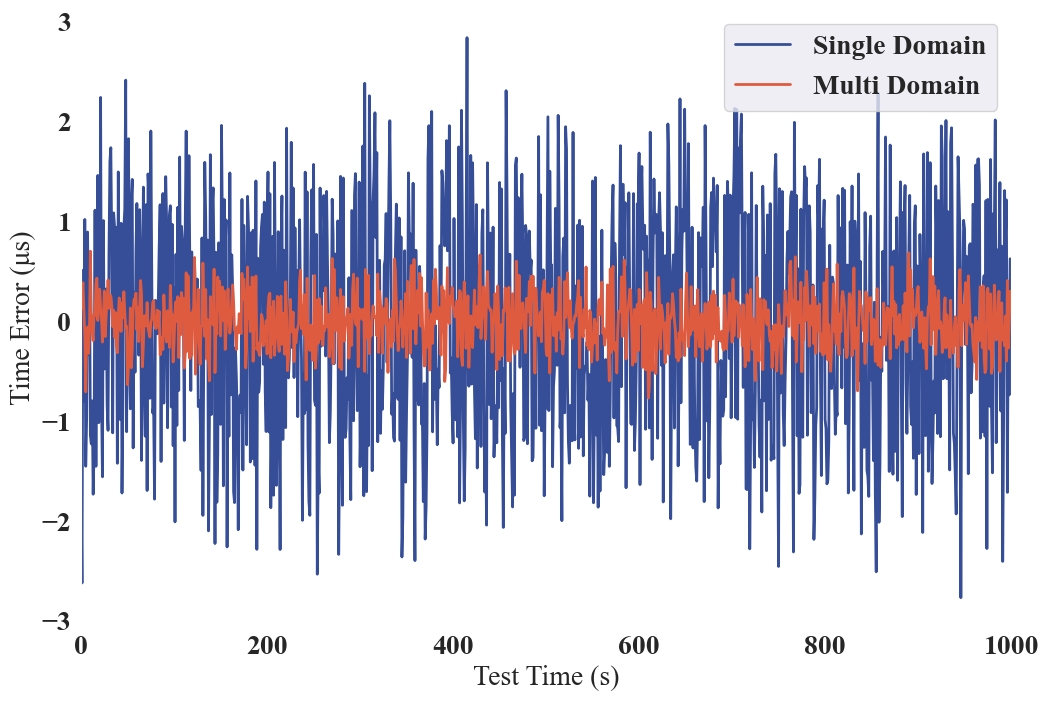

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# 设置全局字体为Times New Roman，字号20，加粗
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20
plt.rcParams['font.weight'] = 'bold'

# 定义颜色方案
colors = ['#354e97', '#df5b3f', '#f5b46f']

# 1. 读取并处理第一组数据
file1_path = r'D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250415\output_data\single_domain_data_v2.csv'
data1 = pd.read_csv(file1_path, header=None).iloc[:, 99].astype(float) * 1e6
data1 = data1[1:]  # 排除第一个异常值

# 2. 读取并处理第二组数据
file2_path = r'D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250415\output_data\multi_domain_data_v2.csv'
data2 = pd.read_csv(file2_path, header=None).iloc[:, 99].astype(float) * 1e6
data2 = data2[1:]  # 排除第一个异常值

# 打印处理后的前10个值
print("处理后的单域数据前10值(μs):")
print(np.round(data1.head(10).values, 2))
print("\n处理后的多域数据前10值(μs):")
print(np.round(data2.head(10).values, 2))

# 创建图形（调整尺寸比例）
plt.figure(figsize=(12, 8))  # 改为更合理的8英寸高度

# 绘制折线图（保持原有设置）
plt.plot(data1.values, color=colors[0], label='Single Domain', linewidth=2)
plt.plot(data2.values, color=colors[1], label='Multi Domain', linewidth=2)

# 设置坐标轴（移除网格）
plt.xlabel('Test Time (s)')
plt.xlim(0, len(data1))
plt.ylabel('Time Error (μs)')

# 仅保留图例（移除网格）
plt.legend()

# 设置纯白背景
plt.gca().set_facecolor('white')  # 坐标区域背景
plt.gcf().set_facecolor('white')  # 整个图形背景

# 保存图像
output_dir = 'output_image'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'time_error_comparison.png')
plt.savefig(output_path, dpi=600, bbox_inches='tight')

plt.show()


# 调整一下风格

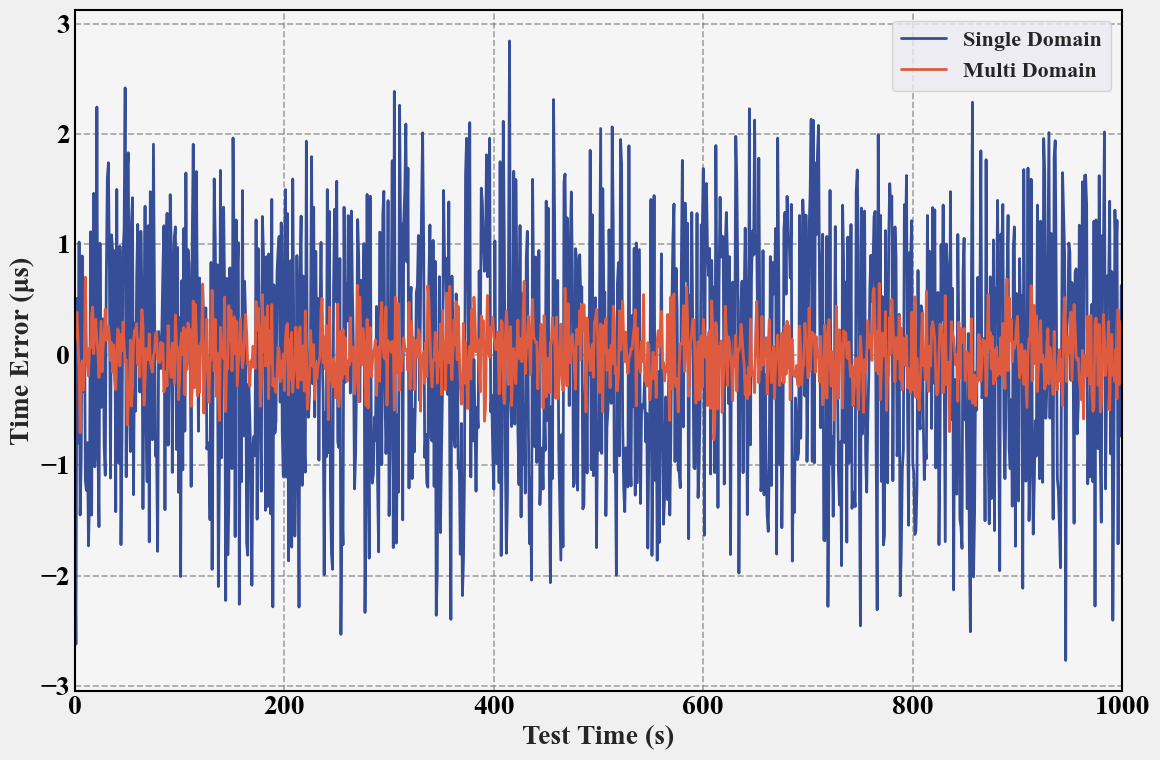

图像已成功生成并保存在output_image文件夹中。


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.font_manager import FontProperties

# 设置全局字体
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 20
plt.rcParams['font.weight'] = 'bold'

# 设置颜色
colors = ['#354e97', '#df5b3f', '#f5b46f']

# 创建输出目录（如果不存在）
output_dir = 'output_image'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 1. 读取第一个CSV文件的数据
file_path1 = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250415\output_data\single_domain_data_v2.csv"
df1 = pd.read_csv(file_path1)

# 获取第100列(索引为99)的数据，注意跳过标题行
col_name1 = df1.columns[99]  # 获取列名
data1 = df1[col_name1].values  # 获取该列所有数据

# 将数据从秒转换为微秒
data1_us = data1 * 1e6  # 秒转换为微秒

# 2. 读取第二个CSV文件的数据
file_path2 = r"D:\06_engineering\03_analysis\pj_gptp_simulation\version\20250415\output_data\multi_domain_data_v2.csv"
df2 = pd.read_csv(file_path2)

# 获取第100列的数据
col_name2 = df2.columns[99]  # 获取列名
data2 = df2[col_name2].values  # 获取该列所有数据

# 将数据从秒转换为微秒
data2_us = data2 * 1e6  # 秒转换为微秒

# 3. 创建x轴数据（从0开始）
x1 = np.arange(len(data1_us))
x2 = np.arange(len(data2_us))

# 4. 绘制折线图
fig, ax = plt.subplots(figsize=(12, 8))

# 设置图表背景色为浅灰色
fig.patch.set_facecolor('#f0f0f0')  # 设置图形背景
ax.set_facecolor('#f5f5f5')  # 设置坐标轴背景

# 绘制第一组数据
ax.plot(x1, data1_us, color=colors[0], linewidth=2, label='Single Domain')

# 绘制第二组数据
ax.plot(x2, data2_us, color=colors[1], linewidth=2, label='Multi Domain')

# 设置坐标轴颜色和宽度，确保它们可见
ax.spines['bottom'].set_color('black')  # x轴颜色
ax.spines['left'].set_color('black')    # y轴颜色
ax.spines['bottom'].set_linewidth(1.5)  # x轴线宽
ax.spines['left'].set_linewidth(1.5)    # y轴线宽

# 确保右侧和顶部边框也可见
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)

# 设置刻度向内
ax.tick_params(direction='in', width=1.5, length=6, colors='black')

# 设置x轴从0开始
ax.set_xlim(left=0,right=1000)  # 确保x轴从0开始

# 设置网格线，使用深色并增加线宽以确保可见性
ax.grid(True, linestyle='--', linewidth=1.2, color='gray', alpha=0.7, zorder=0)

# 设置图表标题和标签
ax.set_xlabel('Test Time (s)', fontweight='bold')
ax.set_ylabel('Time Error (μs)', fontweight='bold')

# 添加图例
ax.legend(fontsize=16)

# 调整布局
plt.tight_layout()

# 5. 保存图片（600 DPI）
plt.savefig(os.path.join(output_dir, 'time_error_comparison.png'), dpi=600, bbox_inches='tight')

# 6. 显示图片
plt.show()

print("图像已成功生成并保存在output_image文件夹中。")

# 支持可变域大小的多域同步模拟代码

In [33]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/4/15 8:42
*  @Project :   pj_gptp_simulation
*  @Description :   IEEE 802.1AS Multi-Domain Simulation with Variable Domain Size
*  @FileName:   main20250415_multi_domain_variable.py
**************************************
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import time

# Create the output directories
os.makedirs("output_data", exist_ok=True)
os.makedirs("output_image", exist_ok=True)

# Parameters from the paper
PHY_JITTER_MAX = 8e-9  # 8 ns
CLOCK_GRANULARITY = 8e-9  # 8 ns
MAX_DRIFT_RATE = 10e-6  # 10 ppm
NR_ERROR = 0.1e-6  # 0.1 ppm
RESIDENCE_TIME_MAX = 1e-3  # 1 ms
PROPAGATION_DELAY = 25e-9  # 25 ns
SYNC_INTERVAL = 31.25e-3  # 31.25 ms
NUM_SAMPLES = 1000  # Samples per hop
TOTAL_HOPS = 100  # Total number of hops to simulate

# Parameters for multi-domain simulation
DOMAIN_BOUNDARY_ERROR_MAX = 30e-9  # Maximum error at domain boundaries (30 ns)

# Define different domain size configurations to test
DOMAIN_SIZE_CONFIGS = {
    'small': 5,    # 5 hops per domain (20 domains total)
    'medium': 10,  # 10 hops per domain (10 domains total)
    'large': 20,   # 20 hops per domain (5 domains total)
    'xlarge': 50,  # 50 hops per domain (2 domains total)
}


def calculate_time_error(hops, sync_interval=SYNC_INTERVAL):
    """
    Calculate time synchronization error based on the paper's equations for single domain.
    """
    # Basic error from clock drift (equation 11)
    gm_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    node_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)
    basic_error = (node_drift - gm_drift) * sync_interval

    # Errors due to PHY jitter and clock granularity
    if hops > 1:
        # Timestamp error
        timestamp_error = np.random.uniform(0, PHY_JITTER_MAX) + np.random.uniform(0, CLOCK_GRANULARITY)

        # Error propagation factor based on equations (16)-(23)
        error_factor = np.random.uniform(0.5, 1.0)

        # Calculate accumulated error (grows with hop count)
        accumulated_error = timestamp_error * error_factor * hops

        # From Figure 10 - error grows faster after ~30 hops
        if hops > 30:
            accumulated_error *= 1 + (hops - 30) / 100
    else:
        accumulated_error = 0

    # Total error
    total_error = basic_error + accumulated_error

    # Randomize sign (error can be positive or negative)
    if np.random.random() < 0.5:
        total_error = -total_error

    return total_error


def calculate_multi_domain_time_error(total_hops, domain_size):
    """
    Calculate time synchronization error with multi-domain approach.
    
    In this approach:
    - Each domain has its own GM
    - Error only accumulates within each domain (max domain_size hops)
    - Additional errors occur at domain boundaries
    
    Args:
        total_hops: The total number of hops from the network entry
        domain_size: Number of hops per domain
    """
    # Calculate which domain and which hop within that domain
    current_domain = (total_hops - 1) // domain_size + 1
    hop_within_domain = ((total_hops - 1) % domain_size) + 1
    
    # Calculate domain-internal error (only from current domain's GM)
    domain_error = calculate_time_error(hop_within_domain)
    
    # Add boundary errors from all previous domain crossings
    boundary_errors = 0
    if current_domain > 1:
        # Accumulate errors from each boundary crossing
        for i in range(current_domain - 1):
            boundary_error = np.random.uniform(0, DOMAIN_BOUNDARY_ERROR_MAX)
            # In real systems, boundary errors can be positive or negative
            if np.random.random() < 0.5:
                boundary_error = -boundary_error
            boundary_errors += boundary_error
    
    # Total error is domain-internal error plus all boundary crossing errors
    total_error = domain_error + boundary_errors
    
    return total_error


# Generate data for single domain approach (original method)
print("Generating data for single domain approach...")
start_time = time.time()
single_domain_data = {}
for h in range(1, TOTAL_HOPS + 1):
    print(f"Simulating single domain hop {h}...")
    hop_errors = [calculate_time_error(h) for _ in range(NUM_SAMPLES)]
    single_domain_data[h] = hop_errors

# Save to CSV
single_df = pd.DataFrame({hop: single_domain_data[hop] for hop in range(1, TOTAL_HOPS + 1)})
single_df.to_csv("output_data/single_domain_data_v3.csv", index=False)
print(f"Single domain simulation completed in {time.time() - start_time:.2f} seconds")

# Generate data for multi-domain approach with different domain sizes
multi_domain_results = {}

for config_name, domain_size in DOMAIN_SIZE_CONFIGS.items():
    print(f"Generating data for multi-domain approach with {domain_size} hops per domain ({config_name})...")
    start_time = time.time()
    
    multi_domain_data = {}
    for h in range(1, TOTAL_HOPS + 1):
        print(f"Simulating multi-domain hop {h} with domain size {domain_size}...")
        hop_errors = [calculate_multi_domain_time_error(h, domain_size) for _ in range(NUM_SAMPLES)]
        multi_domain_data[h] = hop_errors
    
    # Store the results for this configuration
    multi_domain_results[config_name] = multi_domain_data
    
    # Save multi-domain data to CSV
    multi_df = pd.DataFrame({hop: multi_domain_data[hop] for hop in range(1, TOTAL_HOPS + 1)})
    multi_df.to_csv(f"output_data/multi_domain_data_{config_name}_v3.csv", index=False)
    print(f"{config_name} domain simulation completed in {time.time() - start_time:.2f} seconds")

# PLOTTING SECTION

# Plot 1: Comparison of Time Error CDF for hop 100 across all configurations
plt.figure(figsize=(14, 10))

# Single domain data for hop 100
errors_single = np.array(single_domain_data[TOTAL_HOPS])
errors_single_us = errors_single * 1e6  # Convert to microseconds
sorted_errors_single = np.sort(errors_single_us)
cumulative_prob_single = np.linspace(0, 1, len(sorted_errors_single))

plt.plot(sorted_errors_single, cumulative_prob_single,
         label=f'Single Domain',
         color='#E41A1C',  # red
         linewidth=2)

# Color map for multi-domain configurations
config_colors = {
    'small': '#377EB8',    # blue
    'medium': '#4DAF4A',   # green
    'large': '#984EA3',    # purple
    'xlarge': '#FF7F00',   # orange
}

# Plot each multi-domain configuration
for config_name, domain_size in DOMAIN_SIZE_CONFIGS.items():
    errors_multi = np.array(multi_domain_results[config_name][TOTAL_HOPS])
    errors_multi_us = errors_multi * 1e6  # Convert to microseconds
    sorted_errors_multi = np.sort(errors_multi_us)
    cumulative_prob_multi = np.linspace(0, 1, len(sorted_errors_multi))
    
    # Calculate statistics for annotations
    single_median = np.median(np.abs(errors_single_us))
    multi_median = np.median(np.abs(errors_multi_us))
    
    plt.plot(sorted_errors_multi, cumulative_prob_multi,
             label=f'Domain Size {domain_size} ({config_name}) - Median: {multi_median:.2f}μs',
             color=config_colors[config_name],
             linewidth=2)

# Configure plot appearance
plt.grid(True, alpha=0.3)
plt.xlabel('Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('CDF', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.legend(fontsize=16, frameon=True, shadow=False, edgecolor='black', prop={'family': 'Times New Roman'})
plt.xticks(fontname='Times New Roman', fontsize=20)
plt.yticks(fontname='Times New Roman', fontsize=20)
plt.title(f'Time Error Comparison: Different Domain Sizes (Hop {TOTAL_HOPS})', 
          fontname='Times New Roman', fontsize=22, fontweight='bold')
plt.tight_layout()
plt.savefig("output_image/domain_size_comparison_cdf_v3.png", dpi=600)
plt.close()

# Plot 2: Time Error vs Hop Number for all approaches (both absolute and real values)
for error_type in ['absolute', 'real']:
    plt.figure(figsize=(16, 12))
    
    # Prepare data for single domain
    single_domain_errors = {}
    for h in range(1, TOTAL_HOPS + 1, 5):  # Sample every 5 hops for clarity
        errors = np.array(single_domain_data[h])
        errors_us = errors * 1e6  # Convert to microseconds
        
        if error_type == 'absolute':
            single_domain_errors[h] = np.abs(errors_us)
        else:
            single_domain_errors[h] = errors_us
    
    # Plot for single domain
    hops = list(single_domain_errors.keys())
    single_medians = [np.median(single_domain_errors[h]) for h in hops]
    single_q1 = [np.percentile(single_domain_errors[h], 25) for h in hops]
    single_q3 = [np.percentile(single_domain_errors[h], 75) for h in hops]
    
    plt.plot(hops, single_medians, 'o-', color='#E41A1C', label='Single Domain', 
             linewidth=2, markersize=8, zorder=10)
    plt.fill_between(hops, single_q1, single_q3, color='#E41A1C', alpha=0.2)
    
    # Plot for each multi-domain configuration
    for config_name, domain_size in DOMAIN_SIZE_CONFIGS.items():
        multi_domain_errors = {}
        for h in range(1, TOTAL_HOPS + 1, 5):
            errors = np.array(multi_domain_results[config_name][h])
            errors_us = errors * 1e6
            
            if error_type == 'absolute':
                multi_domain_errors[h] = np.abs(errors_us)
            else:
                multi_domain_errors[h] = errors_us
        
        multi_medians = [np.median(multi_domain_errors[h]) for h in hops]
        multi_q1 = [np.percentile(multi_domain_errors[h], 25) for h in hops]
        multi_q3 = [np.percentile(multi_domain_errors[h], 75) for h in hops]
        
        plt.plot(hops, multi_medians, 's-', color=config_colors[config_name], 
                 label=f'Domain Size {domain_size} ({config_name})', 
                 linewidth=2, markersize=8, zorder=5)
        plt.fill_between(hops, multi_q1, multi_q3, color=config_colors[config_name], alpha=0.2)
        
        # Add vertical lines at domain boundaries for this configuration
        if config_name == 'medium':  # Only show domain boundaries for medium (default) to avoid clutter
            num_domains = TOTAL_HOPS // domain_size
            for i in range(1, num_domains):
                boundary = i * domain_size
                plt.axvline(x=boundary, color='gray', linestyle='--', alpha=0.5)
    
    # Configure plot appearance
    plt.grid(True, alpha=0.3)
    plt.xlabel('Hop Number', fontname='Times New Roman', fontsize=20, fontweight='bold')
    
    if error_type == 'absolute':
        plt.ylabel('Absolute Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
        plt.title('Absolute Time Error vs. Hop Number', fontname='Times New Roman', fontsize=22, fontweight='bold')
        plt.savefig("output_image/hop_vs_absolute_error_v3.png", dpi=600)
    else:
        plt.ylabel('Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
        plt.title('Real Time Error vs. Hop Number', fontname='Times New Roman', fontsize=22, fontweight='bold')
        plt.savefig("output_image/hop_vs_real_error_v3.png", dpi=600)
    
    plt.legend(fontsize=16, frameon=True, shadow=False, edgecolor='black', 
               prop={'family': 'Times New Roman'}, loc='best')
    plt.xticks(fontname='Times New Roman', fontsize=20)
    plt.yticks(fontname='Times New Roman', fontsize=20)
    plt.tight_layout()
    plt.close()

# Plot 3: Domain Size Impact Analysis (Box plot at hop 100)
plt.figure(figsize=(14, 10))

# Prepare data for boxplot
box_data = []
labels = ['Single Domain']

# First, add single domain data
single_errors = np.array(single_domain_data[TOTAL_HOPS]) * 1e6  # Convert to microseconds
box_data.append(np.abs(single_errors))  # Use absolute errors

# Then add data for each domain size configuration
for config_name, domain_size in sorted(DOMAIN_SIZE_CONFIGS.items(), key=lambda x: x[1]):
    multi_errors = np.array(multi_domain_results[config_name][TOTAL_HOPS]) * 1e6
    box_data.append(np.abs(multi_errors))
    labels.append(f'Size {domain_size}\n({config_name})')

# Create boxplot
boxplot = plt.boxplot(box_data, patch_artist=True, showfliers=False, 
                     medianprops={'color': 'black', 'linewidth': 2})

# Color boxes
colors = ['#E41A1C', '#377EB8', '#4DAF4A', '#984EA3', '#FF7F00']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# Configure plot appearance
plt.grid(True, alpha=0.3, axis='y')
plt.xlabel('Domain Configuration', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('Absolute Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.xticks(range(1, len(labels) + 1), labels, fontname='Times New Roman', fontsize=18)
plt.yticks(fontname='Times New Roman', fontsize=20)
plt.title(f'Impact of Domain Size on Time Error (Hop {TOTAL_HOPS})', 
          fontname='Times New Roman', fontsize=22, fontweight='bold')

# Add numeric annotations for median values
for i, data in enumerate(box_data):
    median = np.median(data)
    plt.text(i + 1, median + 0.5, f'{median:.2f}μs', 
             horizontalalignment='center', fontsize=14, fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.savefig("output_image/domain_size_impact_boxplot_v3.png", dpi=600)
plt.close()

# Plot 4: Optimal Domain Size Analysis
# Calculate median error at hop 100 for each configuration
all_configs = ['Single'] + list(DOMAIN_SIZE_CONFIGS.keys())
median_errors = []
num_domains = []

# Single domain (1 domain total)
single_errors = np.abs(np.array(single_domain_data[TOTAL_HOPS]) * 1e6)
median_errors.append(np.median(single_errors))
num_domains.append(1)

# Multi-domain configurations
for config_name, domain_size in sorted(DOMAIN_SIZE_CONFIGS.items(), key=lambda x: x[1]):
    multi_errors = np.abs(np.array(multi_domain_results[config_name][TOTAL_HOPS]) * 1e6)
    median_errors.append(np.median(multi_errors))
    num_domains.append(TOTAL_HOPS // domain_size)  # Number of domains

# Plot domain count vs. error
plt.figure(figsize=(14, 10))
plt.plot(num_domains, median_errors, 'o-', color='#377EB8', linewidth=3, markersize=12)

# Add labels for each point
for i, (x, y, config) in enumerate(zip(num_domains, median_errors, all_configs)):
    plt.annotate(f'{config}\n({TOTAL_HOPS/num_domains[i]:.0f} hops/domain)', 
                 (x, y), textcoords="offset points", 
                 xytext=(0, 10), ha='center',
                 fontsize=14, fontweight='bold',
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Find and mark the optimal point
optimal_idx = np.argmin(median_errors)
plt.plot(num_domains[optimal_idx], median_errors[optimal_idx], 'o', 
         color='red', markersize=15, label='Optimal')

# Configure plot appearance
plt.grid(True, alpha=0.3)
plt.xlabel('Number of Domains', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.ylabel('Median Absolute Time Error (μs)', fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.xticks(fontname='Times New Roman', fontsize=20)
plt.yticks(fontname='Times New Roman', fontsize=20)
plt.title(f'Optimal Domain Count Analysis (Total {TOTAL_HOPS} hops)', 
          fontname='Times New Roman', fontsize=22, fontweight='bold')
plt.tight_layout()
plt.savefig("output_image/optimal_domain_count_v3.png", dpi=600)
plt.close()

print("Simulation complete. Results saved to output_data/ and output_image/ directories.")

Generating data for single domain approach...
Simulating single domain hop 1...
Simulating single domain hop 2...
Simulating single domain hop 3...
Simulating single domain hop 4...
Simulating single domain hop 5...
Simulating single domain hop 6...
Simulating single domain hop 7...
Simulating single domain hop 8...
Simulating single domain hop 9...
Simulating single domain hop 10...
Simulating single domain hop 11...
Simulating single domain hop 12...
Simulating single domain hop 13...
Simulating single domain hop 14...
Simulating single domain hop 15...
Simulating single domain hop 16...
Simulating single domain hop 17...
Simulating single domain hop 18...
Simulating single domain hop 19...
Simulating single domain hop 20...
Simulating single domain hop 21...
Simulating single domain hop 22...
Simulating single domain hop 23...
Simulating single domain hop 24...
Simulating single domain hop 25...
Simulating single domain hop 26...
Simulating single domain hop 27...
Simulating single 

# 支持可变域大小的多域同步模拟代码（含中文注释）

In [ ]:
"""
**************************************
*  @Author  ：   mag1cfox
*  @Time    ：   2025/4/15 8:42
*  @Project :   pj_gptp_simulation
*  @Description :   IEEE 802.1AS 多域同步仿真（支持可变域大小）
*  @FileName:   main20250415_multi_domain_variable.py
**************************************
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import time

# 创建输出目录
os.makedirs("output_data", exist_ok=True)
os.makedirs("output_image", exist_ok=True)

# 从IEEE 802.1AS论文中获取的参数
PHY_JITTER_MAX = 8e-9      # 物理层抖动最大值，8 ns
CLOCK_GRANULARITY = 8e-9   # 时钟粒度，8 ns
MAX_DRIFT_RATE = 10e-6     # 最大时钟漂移率，10 ppm
NR_ERROR = 0.1e-6          # 噪声比误差，0.1 ppm
RESIDENCE_TIME_MAX = 1e-3  # 最大驻留时间，1 ms
PROPAGATION_DELAY = 25e-9  # 传播延迟，25 ns
SYNC_INTERVAL = 31.25e-3   # 同步间隔，31.25 ms
NUM_SAMPLES = 1000         # 每个跳数的样本数量
TOTAL_HOPS = 100           # 要模拟的总跳数

# 多域同步仿真参数
DOMAIN_BOUNDARY_ERROR_MAX = 30e-9  # 域边界处的最大误差，30 ns

# 定义不同的域大小配置进行测试
DOMAIN_SIZE_CONFIGS = {
    'small': 5,    # 每域5跳（总共20个域）
    'medium': 10,  # 每域10跳（总共10个域）
    'large': 20,   # 每域20跳（总共5个域）
    'xlarge': 50,  # 每域50跳（总共2个域）
}


def calculate_time_error(hops, sync_interval=SYNC_INTERVAL):
    """
    根据论文中的公式计算单域方案的时间同步误差。
    
    参数:
        hops: 跳数
        sync_interval: 同步间隔时间
    返回:
        时间同步误差（秒）
    """
    # 基本误差来自时钟漂移（公式11）
    gm_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)  # GM时钟漂移
    node_drift = np.random.uniform(-MAX_DRIFT_RATE, MAX_DRIFT_RATE)  # 节点时钟漂移
    basic_error = (node_drift - gm_drift) * sync_interval  # 基本漂移误差
    
    # 由PHY抖动和时钟粒度导致的误差
    if hops > 1:
        # 时间戳误差
        timestamp_error = np.random.uniform(0, PHY_JITTER_MAX) + np.random.uniform(0, CLOCK_GRANULARITY)
        
        # 基于公式(16)-(23)的误差传播因子
        error_factor = np.random.uniform(0.5, 1.0)
        
        # 计算累积误差（随跳数增长）
        accumulated_error = timestamp_error * error_factor * hops
        
        # 根据图10 - 超过30跳后误差增长更快
        if hops > 30:
            accumulated_error *= 1 + (hops - 30) / 100
    else:
        accumulated_error = 0
    
    # 总误差
    total_error = basic_error + accumulated_error
    
    # 随机化符号（误差可正可负）
    if np.random.random() < 0.5:
        total_error = -total_error
        
    return total_error


def calculate_multi_domain_time_error(total_hops, domain_size):
    """
    计算多域同步方案的时间同步误差。
    
    在这种方案中:
    - 每个域有自己的GM（时钟主设备）
    - 误差仅在每个域内累积（最多domain_size跳）
    - 域边界处会产生额外误差
    
    参数:
        total_hops: 从网络入口开始的总跳数
        domain_size: 每个域的跳数
    返回:
        时间同步误差（秒）
    """
    # 计算当前处于哪个域以及在该域内的第几跳
    current_domain = (total_hops - 1) // domain_size + 1  # 当前域编号
    hop_within_domain = ((total_hops - 1) % domain_size) + 1  # 在当前域内的跳数
    
    # 计算域内误差（仅来自当前域的GM）
    domain_error = calculate_time_error(hop_within_domain)
    
    # 添加来自之前所有域边界交叉的误差
    boundary_errors = 0
    if current_domain > 1:
        # 累积每个边界交叉产生的误差
        for i in range(current_domain - 1):
            boundary_error = np.random.uniform(0, DOMAIN_BOUNDARY_ERROR_MAX)
            # 在实际系统中，边界误差可正可负
            if np.random.random() < 0.5:
                boundary_error = -boundary_error
            boundary_errors += boundary_error
    
    # 总误差是域内误差加上所有边界交叉误差
    total_error = domain_error + boundary_errors
    
    return total_error


# 生成单域方案的数据（原始方法）
print("正在生成单域方案的数据...")
start_time = time.time()
single_domain_data = {}
for h in range(1, TOTAL_HOPS + 1):
    print(f"模拟单域方案的第{h}跳...")
    hop_errors = [calculate_time_error(h) for _ in range(NUM_SAMPLES)]
    single_domain_data[h] = hop_errors

# 保存到CSV文件
single_df = pd.DataFrame({hop: single_domain_data[hop] for hop in range(1, TOTAL_HOPS + 1)})
single_df.to_csv("output_data/single_domain_data_v4.csv", index=False)
print(f"单域方案模拟完成，耗时{time.time() - start_time:.2f}秒")

# 使用不同域大小为多域方案生成数据
multi_domain_results = {}

for config_name, domain_size in DOMAIN_SIZE_CONFIGS.items():
    print(f"正在生成多域方案数据，每域{domain_size}跳（{config_name}配置）...")
    start_time = time.time()
    
    multi_domain_data = {}
    for h in range(1, TOTAL_HOPS + 1):
        print(f"模拟多域方案的第{h}跳，域大小为{domain_size}...")
        hop_errors = [calculate_multi_domain_time_error(h, domain_size) for _ in range(NUM_SAMPLES)]
        multi_domain_data[h] = hop_errors
    
    # 存储此配置的结果
    multi_domain_results[config_name] = multi_domain_data
    
    # 保存多域数据到CSV
    multi_df = pd.DataFrame({hop: multi_domain_data[hop] for hop in range(1, TOTAL_HOPS + 1)})
    multi_df.to_csv(f"output_data/multi_domain_data_{config_name}.csv", index=False)
    print(f"{config_name}域配置模拟完成，耗时{time.time() - start_time:.2f}秒")

# 绘图部分 

# 图1：各配置在第100跳处的时间误差CDF比较
plt.figure(figsize=(14, 10))

# 单域方案在第100跳的数据
errors_single = np.array(single_domain_data[TOTAL_HOPS])
errors_single_us = errors_single * 1e6  # 转换为微秒
sorted_errors_single = np.sort(errors_single_us)
cumulative_prob_single = np.linspace(0, 1, len(sorted_errors_single))

plt.plot(sorted_errors_single, cumulative_prob_single,
         label=f'单域方案',
         color='#E41A1C',  # 红色
         linewidth=2)

# 多域配置的颜色映射
config_colors = {
    'small': '#377EB8',    # 蓝色
    'medium': '#4DAF4A',   # 绿色
    'large': '#984EA3',    # 紫色
    'xlarge': '#FF7F00',   # 橙色
}

# 绘制每种多域配置
for config_name, domain_size in DOMAIN_SIZE_CONFIGS.items():
    errors_multi = np.array(multi_domain_results[config_name][TOTAL_HOPS])
    errors_multi_us = errors_multi * 1e6  # 转换为微秒
    sorted_errors_multi = np.sort(errors_multi_us)
    cumulative_prob_multi = np.linspace(0, 1, len(sorted_errors_multi))
    
    # 计算统计数据用于注释
    single_median = np.median(np.abs(errors_single_us))
    multi_median = np.median(np.abs(errors_multi_us))
    
    plt.plot(sorted_errors_multi, cumulative_prob_multi,
             label=f'域大小{domain_size}（{config_name}）- 中位数: {multi_median:.2f}μs',
             color=config_colors[config_name],
             linewidth=2)

# 配置图形外观
plt.grid(True, alpha=0.3)
plt.xlabel('时间误差 (μs)', fontname='SimHei', fontsize=20, fontweight='bold')
plt.ylabel('CDF', fontname='SimHei', fontsize=20, fontweight='bold')
plt.legend(fontsize=16, frameon=True, shadow=False, edgecolor='black', prop={'family': 'SimHei'})
plt.xticks(fontname='SimHei', fontsize=20)
plt.yticks(fontname='SimHei', fontsize=20)
plt.title(f'不同域大小配置的时间误差比较（第{TOTAL_HOPS}跳）', 
          fontname='SimHei', fontsize=22, fontweight='bold')
plt.tight_layout()
plt.savefig("output_image/domain_size_comparison_cdf_v4.png", dpi=600)
plt.close()

# 图2：所有方案的时间误差与跳数关系（同时生成绝对值和真实值两个版本）
for error_type in ['absolute', 'real']:
    plt.figure(figsize=(16, 12))
    
    # 准备单域方案数据
    single_domain_errors = {}
    for h in range(1, TOTAL_HOPS + 1, 5):  # 每5跳采样一次以提高清晰度
        errors = np.array(single_domain_data[h])
        errors_us = errors * 1e6  # 转换为微秒
        
        if error_type == 'absolute':
            single_domain_errors[h] = np.abs(errors_us)  # 绝对值误差
        else:
            single_domain_errors[h] = errors_us  # 真实值误差（包含正负）
    
    # 绘制单域方案数据
    hops = list(single_domain_errors.keys())
    single_medians = [np.median(single_domain_errors[h]) for h in hops]
    single_q1 = [np.percentile(single_domain_errors[h], 25) for h in hops]
    single_q3 = [np.percentile(single_domain_errors[h], 75) for h in hops]
    
    plt.plot(hops, single_medians, 'o-', color='#E41A1C', label='单域方案', 
             linewidth=2, markersize=8, zorder=10)
    plt.fill_between(hops, single_q1, single_q3, color='#E41A1C', alpha=0.2)
    
    # 为每种多域配置绘图
    for config_name, domain_size in DOMAIN_SIZE_CONFIGS.items():
        multi_domain_errors = {}
        for h in range(1, TOTAL_HOPS + 1, 5):
            errors = np.array(multi_domain_results[config_name][h])
            errors_us = errors * 1e6
            
            if error_type == 'absolute':
                multi_domain_errors[h] = np.abs(errors_us)  # 绝对值误差
            else:
                multi_domain_errors[h] = errors_us  # 真实值误差
        
        multi_medians = [np.median(multi_domain_errors[h]) for h in hops]
        multi_q1 = [np.percentile(multi_domain_errors[h], 25) for h in hops]
        multi_q3 = [np.percentile(multi_domain_errors[h], 75) for h in hops]
        
        plt.plot(hops, multi_medians, 's-', color=config_colors[config_name], 
                 label=f'域大小{domain_size}（{config_name}）', 
                 linewidth=2, markersize=8, zorder=5)
        plt.fill_between(hops, multi_q1, multi_q3, color=config_colors[config_name], alpha=0.2)
        
        # 为该配置添加域边界垂直线
        if config_name == 'medium':  # 仅显示中等域大小（默认）的边界以避免图形混乱
            num_domains = TOTAL_HOPS // domain_size
            for i in range(1, num_domains):
                boundary = i * domain_size
                plt.axvline(x=boundary, color='gray', linestyle='--', alpha=0.5)
    
    # 配置图形外观
    plt.grid(True, alpha=0.3)
    plt.xlabel('跳数', fontname='SimHei', fontsize=20, fontweight='bold')
    
    if error_type == 'absolute':
        plt.ylabel('绝对时间误差 (μs)', fontname='SimHei', fontsize=20, fontweight='bold')
        plt.title('绝对时间误差与跳数关系', fontname='SimHei', fontsize=22, fontweight='bold')
        plt.savefig("output_image/hop_vs_absolute_error.png", dpi=600)
    else:
        plt.ylabel('时间误差 (μs)', fontname='SimHei', fontsize=20, fontweight='bold')
        plt.title('真实时间误差与跳数关系', fontname='SimHei', fontsize=22, fontweight='bold')
        plt.savefig("output_image/hop_vs_real_error_v4.png", dpi=600)
    
    plt.legend(fontsize=16, frameon=True, shadow=False, edgecolor='black', 
               prop={'family': 'SimHei'}, loc='best')
    plt.xticks(fontname='SimHei', fontsize=20)
    plt.yticks(fontname='SimHei', fontsize=20)
    plt.tight_layout()
    plt.close()

# 图3：域大小影响分析（第100跳处的箱线图）
plt.figure(figsize=(14, 10))

# 准备箱线图数据
box_data = []
labels = ['单域方案']

# 首先，添加单域方案数据
single_errors = np.array(single_domain_data[TOTAL_HOPS]) * 1e6  # 转换为微秒
box_data.append(np.abs(single_errors))  # 使用绝对误差

# 然后添加每种域大小配置的数据（按域大小排序）
for config_name, domain_size in sorted(DOMAIN_SIZE_CONFIGS.items(), key=lambda x: x[1]):
    multi_errors = np.array(multi_domain_results[config_name][TOTAL_HOPS]) * 1e6
    box_data.append(np.abs(multi_errors))
    labels.append(f'大小{domain_size}\n({config_name})')

# 创建箱线图
boxplot = plt.boxplot(box_data, patch_artist=True, showfliers=False, 
                     medianprops={'color': 'black', 'linewidth': 2})

# 为箱体上色
colors = ['#E41A1C', '#377EB8', '#4DAF4A', '#984EA3', '#FF7F00']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

# 配置图形外观
plt.grid(True, alpha=0.3, axis='y')
plt.xlabel('域配置', fontname='SimHei', fontsize=20, fontweight='bold')
plt.ylabel('绝对时间误差 (μs)', fontname='SimHei', fontsize=20, fontweight='bold')
plt.xticks(range(1, len(labels) + 1), labels, fontname='SimHei', fontsize=18)
plt.yticks(fontname='SimHei', fontsize=20)
plt.title(f'域大小对时间误差的影响（第{TOTAL_HOPS}跳）', 
          fontname='SimHei', fontsize=22, fontweight='bold')

# 添加中位数值的数字标注
for i, data in enumerate(box_data):
    median = np.median(data)
    plt.text(i + 1, median + 0.5, f'{median:.2f}μs', 
             horizontalalignment='center', fontsize=14, fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.3'))

plt.tight_layout()
plt.savefig("output_image/domain_size_impact_boxplot_v4.png", dpi=600)
plt.close()

# 图4：最优域大小分析
# 计算每个配置在第100跳的中位数误差
all_configs = ['Single'] + list(DOMAIN_SIZE_CONFIGS.keys())
median_errors = []
num_domains = []

# 单域方案（总共1个域）
single_errors = np.abs(np.array(single_domain_data[TOTAL_HOPS]) * 1e6)
median_errors.append(np.median(single_errors))
num_domains.append(1)

# 多域配置（按域大小排序）
for config_name, domain_size in sorted(DOMAIN_SIZE_CONFIGS.items(), key=lambda x: x[1]):
    multi_errors = np.abs(np.array(multi_domain_results[config_name][TOTAL_HOPS]) * 1e6)
    median_errors.append(np.median(multi_errors))
    num_domains.append(TOTAL_HOPS // domain_size)  # 域的数量

# 绘制域数量与误差关系图
plt.figure(figsize=(14, 10))
plt.plot(num_domains, median_errors, 'o-', color='#377EB8', linewidth=3, markersize=12)

# 为每个点添加标签
for i, (x, y, config) in enumerate(zip(num_domains, median_errors, all_configs)):
    plt.annotate(f'{config}\n({TOTAL_HOPS/num_domains[i]:.0f} 跳/域)', 
                 (x, y), textcoords="offset points", 
                 xytext=(0, 10), ha='center',
                 fontsize=14, fontweight='bold',
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# 找出并标记最优点
optimal_idx = np.argmin(median_errors)
plt.plot(num_domains[optimal_idx], median_errors[optimal_idx], 'o', 
         color='red', markersize=15, label='最优点')

# 配置图形外观
plt.grid(True, alpha=0.3)
plt.xlabel('域数量', fontname='SimHei', fontsize=20, fontweight='bold')
plt.ylabel('中位数绝对时间误差 (μs)', fontname='SimHei', fontsize=20, fontweight='bold')
plt.xticks(fontname='SimHei', fontsize=20)
plt.yticks(fontname='SimHei', fontsize=20)
plt.title(f'最优域数量分析（总共{TOTAL_HOPS}跳）', 
          fontname='SimHei', fontsize=22, fontweight='bold')
plt.tight_layout()
plt.savefig("output_image/optimal_domain_count_v4.png", dpi=600)
plt.close()

print("仿真完成。结果已保存到output_data/和output_image/目录中。")